In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
# Additional Libraries attempted in this notebook
# !pip install fancyimpute
# !pip install dirty-cat
# !pip install skrub
# !pip install feature-engine
# !pip install fuzzywuzzy
# !pip install python-Levenshtein

In [119]:
# Target Encoding?
# Top 3 Encoders Implementation?
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [120]:
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.feature_selection import RFE

In [121]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class/PG WD-45/CSV/MyBank.csv')
d.head()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
1,8912,northeast@new york@us,99,94,61,602,16980,-4.0,512.0,013 netvision fix ip users,...,Windows 7,Edge,-121.8382,27.9860,-112.0826,33.7985,0.0,0.0,315.0,0
2,92186,mid atlantic@new jersey@us,76,95,66,505,35620,-6.0,407.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-74.0734,33.7985,-80.3120,32.8494,1.0,NaN,333.0,0
3,12924,south central@arkansas@us,99,23,50,0,35620,-5.0,202.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-88.1029,27.9860,-84.3883,42.1530,1.0,0.0,327.0,0
4,125650,mid atlantic@new jersey@us,99,74,80,602,19100,-8.0,313.0,013 netvision fix ip users,...,Windows 7,Chrome,-58.5244,34.9497,-111.3270,34.0476,1.0,0.0,394.0,0


In [122]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

In [123]:
d.describe()

,TransactionKey,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
count,138752.000000,138752.000000,138752.000000,138752.000000,138752.000000,138752.000000,138752.000000,138740.000000,114363.000000,114521.000000,138752.000000,114373.000000,134682.000000,134714.0,134672.000000,138752.000000
mean,69376.500000,95.532252,78.871541,69.438386,600.997341,27842.709438,-5.810414,494.512332,-89.669418,36.763389,-89.470605,36.784544,0.816041,0.0,350.964573,0.028562
std,40054.396613,8.171424,25.561483,23.239424,173.488234,11612.998102,5.766666,263.428397,29.563767,7.229397,30.108608,7.065221,0.387452,0.0,88.997318,0.166572
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-175.200000,-43.532100,-159.469200,-43.532100,0.000000,0.0,0.000000,0.000000
25%,34688.750000,99.000000,80.000000,66.000000,505.000000,16980.000000,-7.000000,305.000000,-112.082600,33.690300,-112.082600,33.690300,1.000000,0.0,313.000000,0.000000
50%,69376.500000,99.000000,88.000000,77.000000,602.000000,31100.000000,-6.000000,415.000000,-87.671200,38.952000,-87.671200,38.960000,1.000000,0.0,373.000000,0.000000
75%,104064.250000,99.000000,95.000000,80.000000,753.000000,35620.000000,-5.000000,713.000000,-77.878600,41.074100,-77.342500,41.086000,1.000000,0.0,395.000000,0.000000
max,138752.000000,99.000000,99.000000,99.000000,881.000000,49780.000000,999.000000,979.000000,178.458900,65.000000,178.458900,64.832000,1.000000,0.0,620.000000,1.000000


In [124]:
d.describe(include = 'object')

,ConnectionRegion,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,TransactionDateTime,AddressUpdateDate,EmailUpdateDate,webSessOS,webSessWebBrowser
count,138752,138752,138752,138752,138752,138752,138752,138752,138752,138752,138752
unique,500,7620,11,4,231,4,82445,66794,66917,20,23
top,southwest@california@us,time warner cable internet llc,cable,medium,net,SOA,31/05/2013 12:21:33:000,20/01/2004 03:26:16:000,20/01/2004 02:45:44:000,Windows 10,Chrome
freq,26098,15676,70047,92827,74018,71956,11,9820,6289,36042,64624


In [125]:
print(f"Total Null values in each columns\n{d.isnull().sum()}")
print(f"\nTotal Sum of Null values: {d.isnull().sum().sum()}")

Total Null values in each columns
TransactionKey             0
ConnectionRegion           0
V1CF                       0
V2CF                       0
V3CF                       0
V4CF                       0
V5CF                       0
TimeZone                   0
AreaCode                  12
ConnectionOrg              0
ConnectionType             0
ConnectionSpeed            0
V6CF                       0
channel                    0
TransactionDateTime        0
AddressUpdateDate          0
EmailUpdateDate            0
webSessOS                  0
webSessWebBrowser          0
LastLong               24389
LastLat                24231
CurrentLong                0
CurrentLat             24379
IsOldDevice             4070
WebSessionRetail        4038
MainEntityUse           4080
Fraud                      0
dtype: int64

Total Sum of Null values: 85199


In [126]:
missing_val_cols = [col for col in d.columns if d[col].isnull().any()]
missing_val_cols

['AreaCode',
 'LastLong',
 'LastLat',
 'CurrentLat',
 'IsOldDevice',
 'WebSessionRetail',
 'MainEntityUse']

In [127]:
print(d.shape)
print(138752 - 59175)

(138752, 27)
79577


In [128]:
check_ = d[d['Fraud'].isin([0]) & (d['LastLong'].isna() | d['LastLat'].isna() | d['CurrentLat'].isna())]
check_

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
7,64624,southwest@california@us,99,80,66,803,31100,-8.0,305.0,013 netvision fix ip users,...,Windows 10,Chrome,NaN,NaN,-96.8850,28.4902,1.0,0.0,453.0,0
8,130430,great lakes@illinois@us,99,95,61,602,38060,-8.0,847.0,013 netvision fix ip users,...,Mac OS X,Chrome,-96.8142,NaN,-73.9790,32.8088,1.0,NaN,253.0,0
10,122500,south central@louisiana@us,99,88,98,820,35620,-5.0,718.0,013 netvision fix ip users,...,Windows 7,Safari,-118.0890,33.7510,-84.3883,NaN,1.0,0.0,328.0,0
12,99673,southwest@california@us,99,94,50,839,19820,-6.0,708.0,013 netvision fix ip users,...,Mac OS X,IE,NaN,40.7589,-77.0020,NaN,1.0,0.0,335.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138728,11806,mountain@colorado@us,99,88,72,803,33100,-8.0,212.0,zscaler inc.,...,Windows 10,Safari,NaN,40.7589,-92.4505,41.8920,1.0,0.0,52.0,0
138730,100415,great lakes@illinois@us,99,94,66,623,12060,-6.0,732.0,zscaler inc.,...,iOS,Edge,NaN,39.8027,-73.9587,37.3515,1.0,0.0,386.0,0
138736,82189,southwest@nevada@us,95,23,80,524,38060,-8.0,0.0,ztelco,...,Mac OS X,Chrome,-117.1376,NaN,-121.2590,25.7629,0.0,0.0,391.0,0
138737,9818,great lakes@illinois@us,99,23,72,602,35620,-6.0,312.0,z-telecom network,...,Windows 8.1,Mobile Safari,-89.7780,NaN,-82.4638,37.9980,1.0,0.0,361.0,0


- More than 1.6K users were detected fraud, where Latitude and Longitude are unknown
- More than 59k users were detected not-fraud, where Latitude and Longitude are unknown

In [129]:
d.WebSessionRetail.describe()

count    134714.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: WebSessionRetail, dtype: float64

In [130]:
# Test - Dropping rows with null values in the following features
# rows_to_drop = d.index[d['Fraud'].isin([0]) & (d['LastLong'].isna() | d['LastLat'].isna() | d['CurrentLat'].isna())]
# d.drop(rows_to_drop, inplace=True)
# Or we can simply drop em!

# Edit: Permission granted to drop these columns
d.drop(columns = ['LastLong', 'LastLat','CurrentLat','CurrentLong', 'TimeZone', 'TransactionKey', 'WebSessionRetail'], inplace = True)

In [131]:
missing_val_cols = [col for col in d.columns if d[col].isnull().any()]
missing_val_cols

['AreaCode', 'IsOldDevice', 'MainEntityUse']

In [132]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [133]:
# Creating a copy just in case if things get pretty f*ked up, and imputing missing values using Iterative Imputer
# This imputer uses the multivariate imputing strategy, estimating each feature from all others. Works well for numeric features
d_copy = d.copy()
imputer = IterativeImputer(max_iter=10, random_state=0)
d[missing_val_cols] = imputer.fit_transform(d[missing_val_cols])
print(d.isnull().sum())

ConnectionRegion       0
V1CF                   0
V2CF                   0
V3CF                   0
V4CF                   0
V5CF                   0
AreaCode               0
ConnectionOrg          0
ConnectionType         0
ConnectionSpeed        0
V6CF                   0
channel                0
TransactionDateTime    0
AddressUpdateDate      0
EmailUpdateDate        0
webSessOS              0
webSessWebBrowser      0
IsOldDevice            0
MainEntityUse          0
Fraud                  0
dtype: int64


In [134]:
# Another approach for imputing missing values, kinda tideous if you ask me.
# For numerical columns
# d['LastLong'].fillna(d['LastLong'].mean(), inplace=True)
# d['LastLat'].fillna(d['LastLat'].median(), inplace=True)
# d['CurrentLat'].fillna(d['CurrentLat'].mean(), inplace=True)
# d['AreaCode'].fillna(d['AreaCode'].mode()[0], inplace=True)

# For categorical columns
# d['IsOldDevice'].fillna(d['IsOldDevice'].mode()[0], inplace=True)
# d['WebSessionRetail'].fillna(d['WebSessionRetail'].mode()[0], inplace=True)
# d['MainEntityUse'].fillna(d['MainEntityUse'].mode()[0], inplace=True)

In [135]:
# Or simply drop null values
# d.dropna(inplace = True)

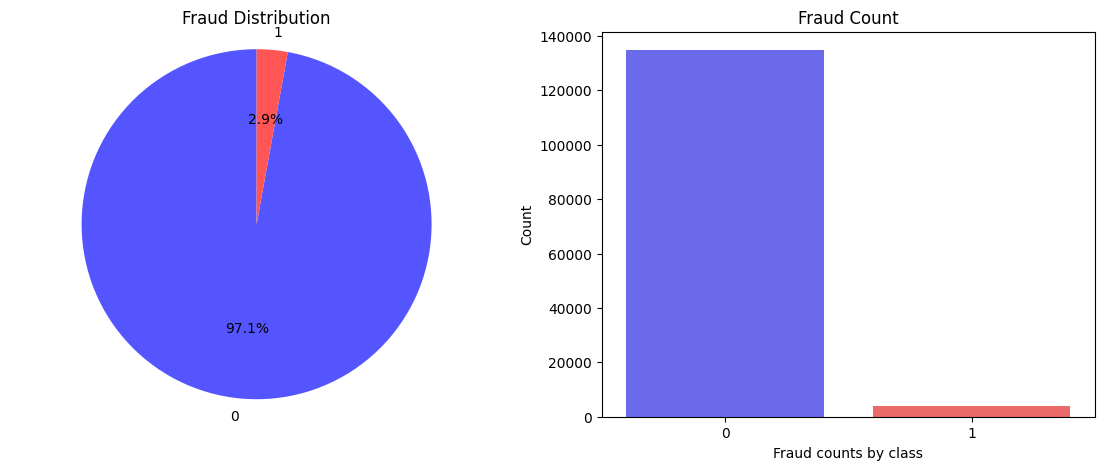

In [136]:
fraud_counts = d['Fraud'].value_counts()
labels = fraud_counts.index
sizes = fraud_counts.values
colors = sns.color_palette('seismic', len(labels))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Fraud Distribution')

# Count plot
sns.countplot(data = d, x = 'Fraud', palette='seismic', ax=ax2)
ax2.set_title('Fraud Count')
ax2.set_xlabel('Fraud counts by class')
ax2.set_ylabel('Count')
plt.show()

Shit's crazily imbalanced

In [137]:
d.nunique()

ConnectionRegion         500
V1CF                       9
V2CF                      29
V3CF                      23
V4CF                     207
V5CF                     582
AreaCode                 254
ConnectionOrg           7620
ConnectionType            11
ConnectionSpeed            4
V6CF                     231
channel                    4
TransactionDateTime    82445
AddressUpdateDate      66794
EmailUpdateDate        66917
webSessOS                 20
webSessWebBrowser         23
IsOldDevice             3113
MainEntityUse            939
Fraud                      2
dtype: int64

## EDA and Visualizations

### CheckPoint-2 (ConnectionRegion)

In [138]:
d[['Region', 'State', 'Country']] = d['ConnectionRegion'].str.split('@', expand=True)
d.drop(columns = 'ConnectionRegion', inplace = True)

In [139]:
# Unknown rows in Region: 4782
# d[d['Region'] == 'unknown']

# Unknown rows in State: 86
# d[d['State'] == 'unknown']

# Unknown rows in Country: 0
# d[d['Country'] == 'unknown']

# Total 83, not-fraud, and unknown
# d[(d['State'] == 'unknown') & (d['Fraud'] == 0)][['Country', 'State', 'Region']]

# Total 3, fraud, and unknown
# d[(d['State'] == 'unknown') & (d['Fraud'] == 1)][['Country', 'State', 'Region']]

print(f"Unknown-Values\n{d[d['State'] == 'unknown'][['Country', 'State','Region']].value_counts()}")
print(f"\nSums of these unknown value: {d[d['State'] == 'unknown'][['Country', 'State','Region']].value_counts().sum()}")

Unknown-Values
Country  State    Region 
af       unknown  unknown    16
za       unknown  unknown    10
ng       unknown  unknown     9
tc       unknown  unknown     6
il       unknown  unknown     5
in       unknown  unknown     5
sn       unknown  unknown     4
mx       unknown  unknown     4
gn       unknown  unknown     3
lr       unknown  unknown     2
be       unknown  unknown     2
vn       unknown  unknown     2
ru       unknown  unknown     2
is       unknown  unknown     2
al       unknown  unknown     2
mf       unknown  unknown     1
mm       unknown  unknown     1
gt       unknown  unknown     1
gq       unknown  unknown     1
pa       unknown  unknown     1
gh       unknown  unknown     1
et       unknown  unknown     1
cr       unknown  unknown     1
tm       unknown  unknown     1
tt       unknown  unknown     1
bz       unknown  unknown     1
at       unknown  unknown     1
dtype: int64

Sums of these unknown value: 86


In [140]:
# Total 259, not-fraud, 'none' values
# d[(d['State'] == 'none') & (d['Fraud'] == 0)][['Country', 'State', 'Region']]

# Total 9, fraud, 'none' values
# d[(d['State'] == 'none') & (d['Fraud'] == 1)][['Country', 'State', 'Region']]

print(f"None-Values: \n{d[d['State'] == 'none'][['Country', 'State','Region']].value_counts()}")
print(f"\nTotal None-Values: {d[d['State'] == 'none'][['Country', 'State','Region']].value_counts().sum()}")
print(f"Total sum of these miscellaneous rows {268 + 86}")

None-Values: 
Country  State  Region 
hk       none   unknown    140
sg       none   unknown     50
pr       none   unknown     34
vi       none   unknown     15
gu       none   unknown      7
aw       none   unknown      5
cw       none   unknown      5
sx       none   unknown      5
bl       none   unknown      2
je       none   unknown      2
tc       none   unknown      2
mf       none   unknown      1
dtype: int64

Total None-Values: 268
Total sum of these miscellaneous rows 354


In [141]:
d = d[d['State'] != 'unknown']
d = d[d['State'] != 'none']
# d[d['State'] == 'unknown'][['Country', 'State','Region']].value_counts()
# None, lmao, I will need to find a way to deal with this, for now we can consider dropping those rows

In [142]:
print(f"Unknown values in Region: \n{d[d['Region'] == 'unknown'][['Country', 'State','Region']].value_counts()}")
print(f"\n Sum of Unknown values in Region: {d[d['Region'] == 'unknown'][['Country', 'State','Region']].value_counts().sum()}")

Unknown values in Region: 
Country  State                   Region 
ve       distrito capital        unknown    700
mx       distrito federal        unknown    183
ca       ontario                 unknown    124
il       hamerkaz                unknown    122
ar       ciudad de buenos aires  unknown     98
                                           ... 
jp       kagawa                  unknown      1
         fukushima               unknown      1
         aichi                   unknown      1
jm       saint james             unknown      1
zw       harare                  unknown      1
Length: 302, dtype: int64

 Sum of Unknown values in Region: 4428


In [143]:
# Replacing unknown with nan
d['Region'] = d['Region'].replace('unknown', pd.NA)

In [144]:
# It worked!
# d['Region'].isnull().sum()
# Splitting data into known and unknown region, one with not-nulls and nulls respectively
not_nulls = d.dropna(subset = ['Region']) # 133K rows
nulls = d[d['Region'].isna()] # 4k rows

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Converting categorical features to numeric features
not_nulls['Country'] = le.fit_transform(not_nulls['Country'])
not_nulls['State'] = le.fit_transform(not_nulls['State'])

In [146]:
features= ['Country', 'State']
target= 'Region'
X_train, X_test, y_train, y_test = train_test_split(not_nulls[features], not_nulls[target], test_size=0.2, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [148]:
# Converting categorical features to numeric features
nulls['Country'] = le.fit_transform(nulls['Country'])
nulls['State'] = le.fit_transform(nulls['State'])

In [149]:
pred_region = clf.predict(nulls[features])

In [150]:
nulls['Country'] = le.inverse_transform(nulls['Country'])
nulls['State'] = le.inverse_transform(nulls['State'])
nulls['Region'] = pred_region

In [151]:
d['Region'] = pd.concat([not_nulls['Region'], nulls['Region']])

In [152]:
print(f"Unknown values in Region: \n{d[d['Region'] == 'unknown'][['Country', 'State','Region']].value_counts()}")
print(f"\n Sum of Unknown values in Region: {d[d['Region'] == 'unknown'][['Country', 'State','Region']].value_counts().sum()}")

Unknown values in Region: 
Series([], dtype: int64)

 Sum of Unknown values in Region: 0


In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_test = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_test, average='weighted'))

Accuracy: 0.9996641039038591
Precision: 0.999735637331741
Recall: 0.9996641039038591
F1 Score: 0.9996697500205748


In [154]:
cols = ['Country', 'State', 'Region']
print(d[cols])
print(f"\n{d['Country'].value_counts()}")
print(f"\n{d['State'].value_counts()}")
print(f"\n{d['Region'].value_counts()}")

       Country       State         Region
0           us       texas  south central
1           us    new york      northeast
2           us  new jersey   mid atlantic
3           us    arkansas  south central
4           us  new jersey   mid atlantic
...        ...         ...            ...
138747      us  california      southwest
138748      us     georgia      southeast
138749      us        ohio    great lakes
138750      us    illinois    great lakes
138751      us     georgia      southeast

[138398 rows x 3 columns]

us    132862
ve       829
mx       461
gb       392
ca       281
       ...  
lc         1
ci         1
mp         1
fj         1
dj         1
Name: Country, Length: 129, dtype: int64

california                26098
new york                  21448
illinois                  21081
texas                     13293
florida                    8239
                          ...  
windsor and maidenhead        1
wexford                       1
puebla                     

### Checkpoint-3 (Date and Time)

In [155]:
d['TransactionDateTime'] = pd.to_datetime(d['TransactionDateTime'], format='%d/%m/%Y %H:%M:%S:%f', errors='coerce')
d['AddressUpdateDate'] = pd.to_datetime(d['AddressUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f', errors='coerce')
d['EmailUpdateDate'] = pd.to_datetime(d['EmailUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f', errors='coerce')

# Extracting day, month, year
d['TransactionDay'] = d['TransactionDateTime'].dt.day
d['TransactionMonth'] = d['TransactionDateTime'].dt.month
# Will work on this one below later
d['TransactionYear'] = d['TransactionDateTime'].dt.year

d['AddressUpdateDay'] = d['AddressUpdateDate'].dt.day
d['AddressUpdateMonth'] = d['AddressUpdateDate'].dt.month
d['AddressUpdateYear'] = d['AddressUpdateDate'].dt.year
d['EmailUpdateDay'] = d['EmailUpdateDate'].dt.day
d['EmailUpdateMonth'] = d['EmailUpdateDate'].dt.month
d['EmailUpdateYear'] = d['EmailUpdateDate'].dt.year

# Extract hours
d['TransactionHour'] = d['TransactionDateTime'].dt.hour
d['AddressUpdateHour'] = d['AddressUpdateDate'].dt.hour
d['EmailUpdateHour'] = d['EmailUpdateDate'].dt.hour

# Calculated the differences - Actually adding this won't make sense, because the features will get highly correlated to each other, which in the end, will make us drop these columns.
# Analysis were conducted while wokring on these columns, observed the correlation matrix and followed the feature importance methodology with the help of target variable.
# Least Important features (given below) were dropped
# d['Transaction_Address_Year_Diff'] = d['AddressUpdateYear'] - d['TransactionYear']
# d['Transaction_Email_Year_Diff'] = d['EmailUpdateYear'] - d['TransactionYear']
# d['Address_Email_Year_Diff'] = d['EmailUpdateYear'] - d['AddressUpdateYear']

In [156]:
# Mapping hours to time of day
def map_to_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

d['TransactionTimeOfDay'] = d['TransactionHour'].apply(map_to_time_of_day)
d['AddressUpdateTimeOfDay'] = d['AddressUpdateHour'].apply(map_to_time_of_day)
d['EmailUpdateTimeOfDay'] = d['EmailUpdateHour'].apply(map_to_time_of_day)

# Dropping OGs
d.drop(['TransactionHour', 'AddressUpdateHour', 'EmailUpdateHour'], axis=1, inplace=True)

In [157]:
temp_display = ['TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate']
d[temp_display]

,TransactionDateTime,AddressUpdateDate,EmailUpdateDate
0,2013-05-23 20:13:05,2004-08-21 05:33:51,2011-10-14 16:37:56
1,2013-05-27 10:56:53,2010-08-24 13:23:30,2007-09-06 19:24:07
2,2013-05-23 12:33:59,2013-03-26 00:43:01,2012-06-20 00:02:35
3,2013-05-31 14:04:35,2009-06-07 14:49:06,2010-12-13 14:08:42
4,2013-06-01 21:07:58,2012-05-09 13:52:37,2009-04-20 14:22:57
...,...,...,...
138747,2013-05-26 10:02:15,2005-11-01 10:06:10,2008-10-15 13:12:47
138748,2013-05-22 23:02:51,2003-02-07 01:39:07,2011-09-21 20:05:54
138749,2013-05-31 22:28:51,2011-04-16 12:07:52,2012-09-14 15:08:44
138750,2013-05-26 06:42:50,2012-04-19 00:28:51,2008-05-27 23:45:41


In [158]:
# d.isnull().sum()
# After extracting the dates, for some instances, we might get null values. We can consider dropping or imputing them.
d.dropna(inplace =  True)

In [159]:
d['EmailUpdateDay'] = d['EmailUpdateDay'].astype(int)
d['EmailUpdateMonth'] = d['EmailUpdateMonth'].astype(int)
d['EmailUpdateYear'] = d['EmailUpdateYear'].astype(int)

In [160]:
ctd = ['TransactionYear', 'TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate']
d.drop(columns = ctd, inplace = True)

In [161]:
temp_disp_3 = ['TransactionTimeOfDay', 'TransactionDay', 'TransactionMonth', 'AddressUpdateDay','AddressUpdateTimeOfDay', 'AddressUpdateMonth',
               'AddressUpdateYear', 'EmailUpdateDay','EmailUpdateTimeOfDay', 'EmailUpdateMonth', 'EmailUpdateYear']

In [162]:
d[temp_disp_3]

,TransactionTimeOfDay,TransactionDay,TransactionMonth,AddressUpdateDay,AddressUpdateTimeOfDay,AddressUpdateMonth,AddressUpdateYear,EmailUpdateDay,EmailUpdateTimeOfDay,EmailUpdateMonth,EmailUpdateYear
0,Evening,23,5,21,Morning,8,2004,14,Afternoon,10,2011
1,Morning,27,5,24,Afternoon,8,2010,6,Evening,9,2007
2,Afternoon,23,5,26,Night,3,2013,20,Night,6,2012
3,Afternoon,31,5,7,Afternoon,6,2009,13,Afternoon,12,2010
4,Night,1,6,9,Afternoon,5,2012,20,Afternoon,4,2009
...,...,...,...,...,...,...,...,...,...,...,...
138747,Morning,26,5,1,Morning,11,2005,15,Afternoon,10,2008
138748,Night,22,5,7,Night,2,2003,21,Evening,9,2011
138749,Night,31,5,16,Afternoon,4,2011,14,Afternoon,9,2012
138750,Morning,26,5,19,Night,4,2012,27,Night,5,2008


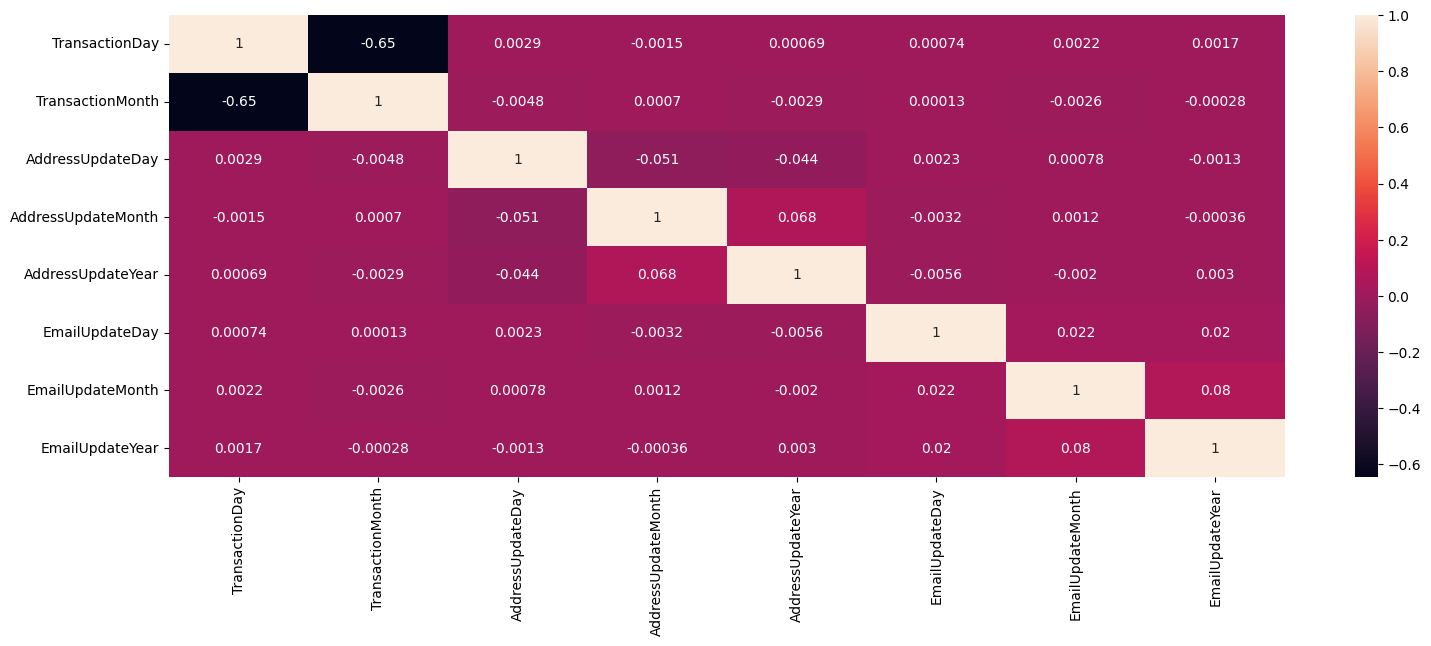

In [163]:
corr = d[temp_disp_3].corr()
plt.figure(figsize = (18, 6))
sns.heatmap(corr, annot = True)
plt.show()

In [164]:
# len(d[temp_disp_3].isnull().sum())
# d[temp_disp_3].isnull().sum()

In [165]:
# checkpoint_break (uncomment this if you're re-running the entire code and wanna make some changes in the next checkpoint)

### Checkpoint-4 (ConnectionOrg) (Incomplete)

In [166]:
# for i, j in d['ConnectionOrg'].value_counts().items():
#     print(f"<{i} : {j}>", end = " ")

In [167]:
# https://dirty-cat.github.io/stable/
# 2. Gap-Encoders (Gamma-Poisson Encoding), 3. MinHashEncoder, 1. Similarity Encoding

#### Gamma-Poisson Encoding
- (F ≈ X * Λ)
- where F is (n * v) or (samples * number of cardinality)
- where X is the number of topics (n * t)
- where Λ is the (n * t)

In [168]:
d[['ConnectionOrg']].sample(3)

,ConnectionOrg
9181,at&t internet services
28638,charter communications
81934,mci communications services inc. d/b/a verizo...


In [169]:
# Let's try Gap-Encoding on this shit
dirty = d[['ConnectionOrg']]

In [170]:
dirty.sort_values(by = 'ConnectionOrg')

,ConnectionOrg
46,012 smile communications ltd.
47,012 smile communications ltd.
48,012 smile communications ltd.
52,013 netvision
53,013 netvision
...,...
138749,zynga corp.
138750,zynga corp.
138747,zynga corp.
138748,zynga corp.


In [171]:
!pip install skrub
from skrub import GapEncoder
enc = GapEncoder()
d_enc = enc.fit_transform(dirty)
d_enc.shape

(138372, 10)

In [172]:
topic_labels = enc.get_feature_names_out(n_labels=15)
for k, labels in enumerate(topic_labels):
    print(f"Topic n°{k}: {labels}")

Topic n°0: brookfieldts, athenahealth, schools, schonfeld, beamspeed, alajuela, fibreop, school, 1hispeed, bedellno, fields, healthmarkets, brooklyn, brenham, guggenheim
Topic n°1: cablecom, telecomunica, software, cablemas, mechanical, megacable, cable, communicacoes, commcare, telecomunicacoes, telecomputing, systems, cablecolor, eastlake, avast
Topic n°2: amnet, water, tmnet, clearwater, arnet, innet, net, netjets, waterfrt, gwgg, warner, ais_internet, bnet, peter, cerfnet
Topic n°3: internet, intern, inter, eternet, int, nysernet, picerne, wintek, stern, condointernet, services, cern, interbel, intel, hunter
Topic n°4: businessam, business, engineering, processing, inversiones, americinn, engineered, using, invesco, american, engineers, ericsson, engine, america, singer
Topic n°5: partnership, wireless, partnerships, partners, verizon, partner, cellco, partne, wire, part, gartner, copart, shi, dba, art
Topic n°6: mobility, mobil, mobile, mob, mobiles, exxonmobil, immobiliari, bill,

In [173]:
d_enc

array([[16.59149926,  0.10829731,  1.91815133, ...,  9.66167741,
         0.29278856,  1.49351025],
       [16.59149926,  0.10829731,  1.91815133, ...,  9.66167741,
         0.29278856,  1.49351025],
       [16.59149926,  0.10829731,  1.91815133, ...,  9.66167741,
         0.29278856,  1.49351025],
       ...,
       [ 0.1202687 ,  0.16554337,  0.05645989, ...,  0.06060299,
         0.09219059,  9.11395386],
       [ 0.1202687 ,  0.16554337,  0.05645989, ...,  0.06060299,
         0.09219059,  9.11395386],
       [ 0.1202687 ,  0.16554337,  0.05645989, ...,  0.06060299,
         0.09219059,  9.11395386]])

In [174]:
d_enc_df = pd.DataFrame(d_enc, columns=[f'encoded_{i}' for i in range(d_enc.shape[1])])
dc = pd.concat([d, d_enc_df], axis=1)

In [175]:
d.shape

(138372, 30)

In [176]:
dc.shape

(138752, 40)

In [177]:
dc.dropna(inplace = True)

In [178]:
# We'll take a look on this one later
gap_encoded_ds = dc.copy()

In [179]:
d['ConnectionOrg'].value_counts()

time warner cable internet llc                              15623
at&t internet services                                      12192
comcast ip services  l.l.c.                                  7474
comcast cable communications  inc.                           6675
mci communications services  inc. d/b/a verizon business     6389
                                                            ...  
homeaway  inc.                                                  1
associated builders and contra                                  1
rapidswitch                                                     1
raumtechnik messebau & event services gmbh                      1
city of palo alto33400464                                       1
Name: ConnectionOrg, Length: 7608, dtype: int64

In [180]:
import string
def clean_text(text):
    # Removes punctuation and extra white spaces
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join(text.split())
    return text

d['ConnectionOrg'] = d['ConnectionOrg'].apply(clean_text)

In [181]:
d['ConnectionOrg'].value_counts()

time warner cable internet llc                          15623
att internet services                                   12192
comcast ip services llc                                  7474
comcast cable communications inc                         7145
mci communications services inc dba verizon business     6389
                                                        ...  
multinet broadband                                          1
bethunecookman university inc                               1
munchkin inc                                                1
murphy oil usa inc                                          1
lewis clark college                                         1
Name: ConnectionOrg, Length: 7578, dtype: int64

,ConnectionOrg,Length
20574,boces southern westchester lower hudson region...,64
100977,san francisco department of telecommunications...,64
771,addresses used to provide broadband access to ...,64
108384,telenor ddo serbia address space for mobile ac...,64
20575,boces southern westchester lower hudson region...,64


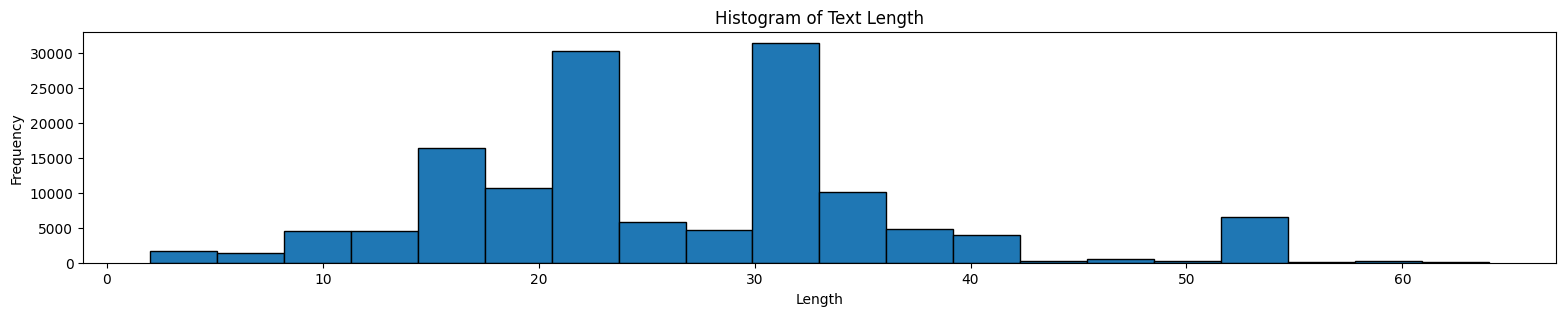

In [182]:
d['Length']=d['ConnectionOrg'].apply(len)
display(d[['ConnectionOrg', 'Length']].sort_values(by = 'Length', ascending = False).head())

#distribution of the data
plt.figure(figsize = (19, 3))
plt.hist(d['Length'], bins=20, edgecolor='black')
plt.title('Histogram of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

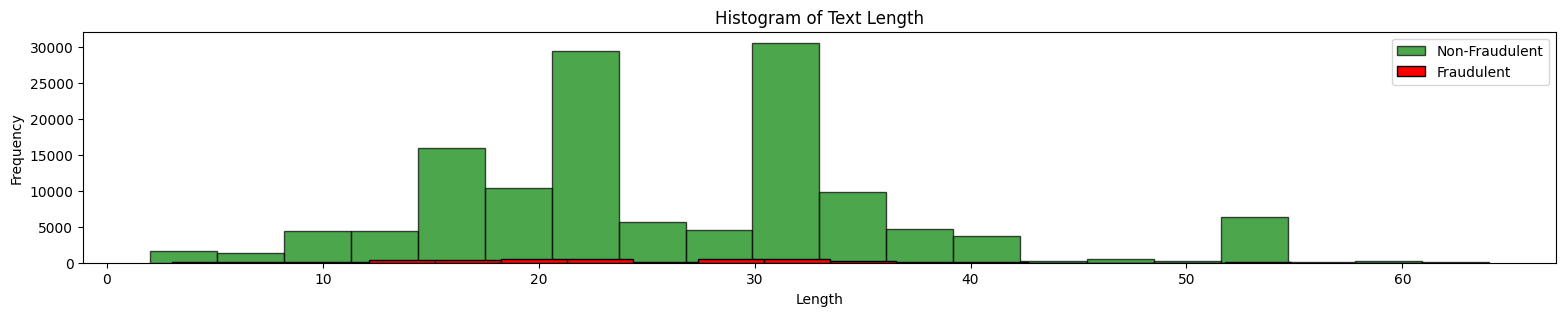

In [183]:
plt.figure(figsize = (19, 3))
# Plot for non-fraudulent and fraudulent cases respectively.
plt.hist(d[d['Fraud'] == 0]['Length'], bins=20, edgecolor='black', color='green', alpha=0.7, label='Non-Fraudulent')
plt.hist(d[d['Fraud'] == 1]['Length'], bins=20, edgecolor='black', color='red', alpha=1.0, label='Fraudulent')
plt.title('Histogram of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

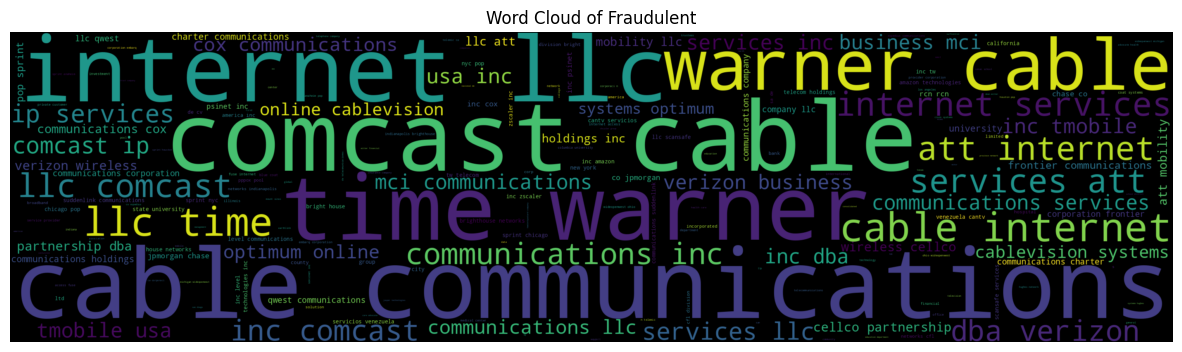

In [184]:
from wordcloud import WordCloud, STOPWORDS
frd = d[d['Fraud'] == 1]
not_frd = d[d['Fraud'] == 0]

def make_wc(data, title):
    words = ' '.join(data['ConnectionOrg'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=3000, height=800).generate(words)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

make_wc(frd, 'Word Cloud of Fraudulent')

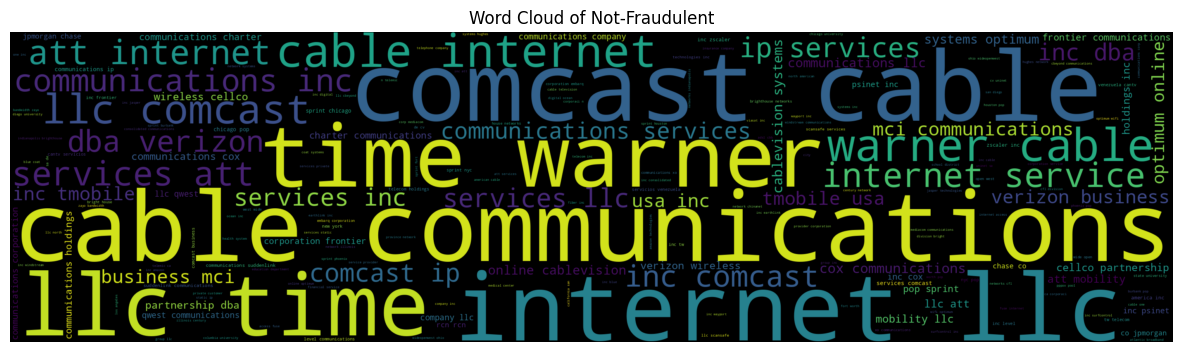

In [185]:
make_wc(not_frd, 'Word Cloud of Not-Fraudulent')

In [186]:
d[['ConnectionOrg', 'Length']].sort_values(by='Length', ascending=False).head(5)

,ConnectionOrg,Length
20574,boces southern westchester lower hudson region...,64
100977,san francisco department of telecommunications...,64
771,addresses used to provide broadband access to ...,64
108384,telenor ddo serbia address space for mobile ac...,64
20575,boces southern westchester lower hudson region...,64


In [187]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

lt = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lt.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

d['ConnectionOrg'] = d['ConnectionOrg'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [188]:
print(d['ConnectionOrg'].value_counts())

time warner cable internet llc                        15623
att internet service                                  12192
comcast ip service llc                                 7474
comcast cable communication inc                        7145
mci communication service inc dba verizon business     6389
                                                      ...  
east texas medical center                                 1
panasonic avionics corporation                            1
panchiao taipei hsien taiwan                              1
east sid e house inc                                      1
lewis university                                          1
Name: ConnectionOrg, Length: 7576, dtype: int64


##### Fuzzy-wuzzy (Start)
This part contains more than 70+ cells, try understanding the code snippet and implement accordingly

In [189]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz, process

target_string = 'comcast'

# The Fuzz Ratio algorithm, also known as Levenshtein distance, measures the similarity between two strings.
# Now, of course, the ratio will be lower because it tends to find SIMILAR strings only.
def calculate_fuzz_ratio(string):
    return fuzz.ratio(target_string, string)

d['FuzzRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_ratio)
print(f"Total count of similarity ratio for {target_string}: {len(d[d['FuzzRatio'] != 0])}\n{d[['ConnectionOrg', 'FuzzRatio']].sort_values(by='FuzzRatio', ascending=False)}")

Total count of similarity ratio for comcast: 138251
      ConnectionOrg  FuzzRatio
22567      camcraft         67
22568      camcraft         67
22569      camcraft         67
56615    compas inc         59
56458    comclarkmc         59
...             ...        ...
69887  giggle fiber          0
69886  giggle fiber          0
69885  giggle fiber          0
69884  giggle fiber          0
76564      livin 11          0

[138372 rows x 2 columns]


In [190]:
target_string = 'comcast'

def calculate_fuzz_partial_ratio(string):
    return fuzz.partial_ratio(target_string, string)

d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
d['FuzzPartialRatio'].sort_values(ascending = False)

35442    100
43327    100
43333    100
43332    100
43331    100
        ... 
64122      0
76416      0
87093      0
87094      0
66045      0
Name: FuzzPartialRatio, Length: 138372, dtype: int64

In [191]:
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
gib['ConnectionOrg'].value_counts()

comcast ip service llc                     7474
comcast cable communication inc            7145
comcast cable communication llc            4420
comcast cable communication holding inc    2568
comcast cable communication                1999
comcast cable communication ip service      891
comcast business communication llc          491
comcast comcast cable communication inc       9
Name: ConnectionOrg, dtype: int64

In [192]:
pd.crosstab(gib['ConnectionOrg'], d['Fraud'], margins=True, margins_name='Total')

Fraud,0,1,Total
ConnectionOrg,,,
comcast business communication llc,473,18,491
comcast cable communication,1951,48,1999
comcast cable communication holding inc,2503,65,2568
comcast cable communication inc,6937,208,7145
comcast cable communication ip service,849,42,891
comcast cable communication llc,4294,126,4420
comcast comcast cable communication inc,9,0,9
comcast ip service llc,7261,213,7474
Total,24277,720,24997


In [193]:
gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Comcast Company'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [194]:
pd.crosstab(d[d['ConnectionOrg'] == 'Comcast Company']['ConnectionOrg'], d[d['ConnectionOrg'] == 'Comcast Company']['Fraud'])

Fraud,0,1
ConnectionOrg,,
Comcast Company,24277,720


In [195]:
# Now Repeat the Process, LMAO
d['ConnectionOrg'].value_counts()

Comcast Company                                       24997
time warner cable internet llc                        15623
att internet service                                  12192
mci communication service inc dba verizon business     6389
tmobile usa inc                                        6220
                                                      ...  
multinet broadband                                        1
bethunecookman university inc                             1
munchkin inc                                              1
murphy oil usa inc                                        1
lexisnexis                                                1
Name: ConnectionOrg, Length: 7569, dtype: int64

In [196]:
target_string = 'time warner'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")


time warner cable internet llc                       15623
time warner enterprise infrastructure service llc        9
time warner inc                                          5
tim                                                      2
Name: ConnectionOrg, dtype: int64


In [197]:
gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Time Warner'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [198]:
target_string = 'cox'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")


cox communication             3243
cox communication inc         2011
cox enterprise inc               4
cox comunications                3
coxreps                          2
the babcock wilcox company       1
Name: ConnectionOrg, dtype: int64


In [199]:
gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Cox Communications'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [200]:
vc = d['ConnectionOrg'].value_counts()

In [201]:
target_string = 'att internet service'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'ATT Internet Services'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [202]:
target_string = 'amazon'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Amazon'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [203]:
target_string = 'att mobility'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'ATT mobility'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [204]:
target_string = 'frontier'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Frontier Communications'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [205]:
target_string = 'bright house'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Bright House'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [206]:
target_string = 'brighthouse'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Bright House'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [207]:
target_string = 'sprint'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Sprint Pop'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


sprint chicago pop          799
sprint nyc pop              516
sprint houston pop          259
sprint burbank pop          202
sprint communication inc    182
sprint fort worth pop       119
sprint phoenix pop          113
sprint anaheim pop           83
sprint orlando pop           71
sprint miami pop             63
sprint harrison pop          58
sprint atlanta pop           51
sprint san jose pop          37
sprint                       30
sprint stockton pop          29
sprint kansa city pop        22
sprint springfield pop       22
sprint seattle pop           22
sprint relay pop             20
sprint saint paul pop        20
sprint englewood pop         14
sprint fairfax pop            8
sprint tacoma pop             8
sprint omaha pop              7
sprint nashville pop          6
sprint cheyenne pop           5
sprint akron pop              5
sprint pearl city pop         4
sprint dc pop                 2
sprint dsl network fl         2
sprint bayamon pop            1
Name: C

In [208]:
target_string = 'optimum'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Optimum'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


optimum online cablevision system    5134
optimum online                        153
optimum wifi                          135
pt                                      2
Name: ConnectionOrg, dtype: int64


In [209]:
target_string = 'wideopenwest'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Wide Open West'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


wideopenwest ohio           191
wideopenwest michigan        89
wideopenwest                 32
wideopenwest finance llc     24
wideopenwest illinois         4
wideopenwest indiana          2
Name: ConnectionOrg, dtype: int64


In [210]:
target_string = 'wide open'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Wide Open West'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


wide open west    308
Name: ConnectionOrg, dtype: int64


In [211]:
target_string = 'american'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'American Services'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [212]:
target_string = 'university'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Universities'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


university of california san diego                            115
university of chicago                                          89
new york university                                            88
the trustee of columbia university in the city of new york     84
northwestern university                                        80
                                                             ... 
national university                                             1
university of michigan library                                  1
north carolina state university                                 1
northern kentucky university                                    1
andrew university                                               1
Name: ConnectionOrg, Length: 289, dtype: int64


In [213]:
target_string = 'static'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Static'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [214]:
target_string = 'venezuela'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Venezuela Services/Communication'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [215]:
target_string = 'telecom'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Telecom'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


tw telecom holding inc                  510
integra telecom inc                      89
tds telecom                              85
korea telecom                            50
apogee telecom inc                       37
                                       ... 
first data corpattn telecom               1
myanma post and telecommunication         1
dct telecom group inc                     1
telexperts telecomunicacoes ltda epp      1
ldtelecom inc                             1
Name: ConnectionOrg, Length: 127, dtype: int64


In [216]:
target_string = 'google'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Google'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [217]:
target_string = 'private'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Private Customers/ltd'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


private customer                                     89
private customer sbc internet service                 8
private customer wave broadband                       6
private customer airpipe                              5
private customerbluegrass                             5
digi star info solution private limited               2
l broadband private limited                           2
zuerinet private allocation                           2
dvois broadband private limited                       1
interwire internet service private limited            1
private layer inc                                     1
samsung data system india private limited             1
thamizhaga internet communication private limited     1
Name: ConnectionOrg, dtype: int64


In [218]:
target_string = 'motor'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Motors'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


ford motor company                 93
general motor llc                  88
motorola inc                       16
tesla motor inc                    13
toyota motor sale usa inc          10
toyota motor engineering            8
general motor corporation           5
sullivan motor car                  4
toyota motor credit corporation     4
motor city pop1                     3
motorola mobility llc               3
motorola mobility                   2
fred m boerner motor co             1
isuzu motor                         1
peterbilt motor company             1
silver star motor                   1
Name: ConnectionOrg, dtype: int64


In [219]:
target_string = 'broadband'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'BroadBands'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


wave broadband                          93
atlantic broadband finance llc          77
atlantic broadband                      37
business only broadband                 25
rainbow broadband inc                   20
                                        ..
gold coast broadband                     1
hiawatha broadband communication inc     1
maxi broadband sdn bhd                   1
mpls adsl broadband                      1
xl broadband inc                         1
Name: ConnectionOrg, Length: 94, dtype: int64


In [220]:
target_string = 'communication inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'communication Inc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [221]:
target_string = 'education'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Department Of Education System'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [222]:
target_string = 'bank'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Banks'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [223]:
target_string = 'service llc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Services LLC'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [224]:
target_string = 'service inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Services INC'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [225]:
target_string = 'technology inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Tech Inc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [226]:
target_string = 'communication llc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Communication llc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [227]:
target_string = 'corporation'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Corporations'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [228]:
target_string = 'financial'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Financial Services'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [229]:
target_string = 'system inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'System Inc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [230]:
target_string = 'insurance'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Insurance Company'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [231]:
target_string = 'group llc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Group llc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [232]:
target_string = 'company llc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Company llc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [233]:
target_string = 'communication co'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Company Corp'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [234]:
target_string = 'son inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Son Inc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [235]:
target_string = 'school'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Schools'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [236]:
target_string = 'mobile'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Mobiles'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [237]:
target_string = 'college'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'College'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [238]:
target_string = 'administrative'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Administrative Service'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


department of administrative service                        29
administrative office of the united state court sid19043     6
blackstone administrative serv                               2
Name: ConnectionOrg, dtype: int64


In [239]:
target_string = 'sa de cv'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'SA DE CV'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


uninet sa de cv                                157
mega cable sa de cv                             38
telefonos del noroeste sa de cv                 38
cablevision sa de cv                            13
megacable comunicaciones de mexico sa de cv     11
cablevisi n sa de cv                            10
marcatel com sa de cv                            9
operbes sa de cv                                 8
radiomovil dipsa sa de cv                        7
television internacional sa de cv                5
cablevision red sa de cv                         4
ip matrix sa de cv                               4
inversiones apolo sa de cv                       1
millicom cable honduras sa de cv                 1
Name: ConnectionOrg, dtype: int64


In [240]:
target_string = 'information technology'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Information Technology'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [241]:
target_string = 'health'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'HealthCare'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [242]:
target_string = 'hospital'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'HealthCare'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [243]:
target_string = 'medical'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'HealthCare'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [244]:
target_string = 'business'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Business'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [245]:
target_string = 'group inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Group Inc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [246]:
target_string = 'management'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Management'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [247]:
target_string = 'china'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Chinese Org'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [248]:
target_string = 'food'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")
gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Food Org'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [249]:
target_string = 'usa'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")
gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'USA misc org'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


musicam usa                        41
headquarters usaisc                33
leaseweb usa inc                   24
arcelormittal usa inc               7
national grid usa                   6
                                   ..
orin usa                            1
omicron electronics corp usa        1
magneti marelli holding usa inc     1
masscom lf usa                      1
help usa                            1
Name: ConnectionOrg, Length: 62, dtype: int64


In [250]:
target_string = 'america'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")
gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'America misc org'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [251]:
target_string = 'pppox'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'pppox pool'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


fyv2ar adsl se1 pppox                 9
pppox pool se1chi2ca1307547061        8
pppox pool se10chcgil 121707 0104     7
pppox pool bras21rcsntx1158629762     6
pppox pool se3lsan031263263161        5
                                     ..
pppox pool se7emhril1195140962        1
pppox pool rback3aus2tx 0819081234    1
pppox pool se9sfldmi1292541360        1
pppox pool rback21 hstntx6            1
pppox pool se11pltn131304495763       1
Name: ConnectionOrg, Length: 108, dtype: int64


In [252]:
target_string = 'enterprise'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Enterprises'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [253]:
target_string = 'pop'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'pop'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [254]:
target_string = 'netvision'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Netvision'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


013 netvision fix ip user    49
013 netvision                15
013 netvision cable           2
Name: ConnectionOrg, dtype: int64


In [255]:
target_string = 'network llc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Network llc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [256]:
target_string = 'network inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Network Inc'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [257]:
target_string = 'service provider'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Service Providers'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [258]:
target_string = 'cable'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Cable-Vision/Tv'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [259]:
target_string = 'cellco'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Cellco'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [260]:
target_string = 'new york'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'New-Yorks Org'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [261]:
d['ConnectionOrg'].value_counts().tail(60)

clark burnett love lee                        1
messagelabs limited                           1
maumee valley computer assn                   1
master distributor                            1
master halco                                  1
auna                                          1
matsui nursery                                1
auburn sd                                     1
matthew riley03192013100049819                1
mattson technology                            1
maximum access                                1
clark regional wastewater district            1
maxlinear                                     1
maxplanckinstitut fuer kernphysik             1
maxuptime llc                                 1
mbh architect                                 1
cap payroll                                   1
mcalpin conroy pa                             1
mccormick place                               1
atlas air inc                                 1
messagelabs ltd                         

In [262]:
d

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,...,AddressUpdateYear,EmailUpdateDay,EmailUpdateMonth,EmailUpdateYear,TransactionTimeOfDay,AddressUpdateTimeOfDay,EmailUpdateTimeOfDay,Length,FuzzRatio,FuzzPartialRatio
0,99,98,10,803,19820,602.0,Netvision,cable,low,net,...,2004,14,10,2011,Evening,Morning,Afternoon,26,12,22
1,99,94,61,602,16980,512.0,Netvision,cable,high,net.il,...,2010,6,9,2007,Morning,Afternoon,Evening,26,12,22
2,76,95,66,505,35620,407.0,Netvision,cable,medium,net,...,2013,20,6,2012,Afternoon,Night,Night,26,12,22
3,99,23,50,0,35620,202.0,Netvision,dsl,high,net,...,2009,13,12,2010,Afternoon,Afternoon,Afternoon,26,12,22
4,99,74,80,602,19100,313.0,Netvision,cable,medium,net,...,2012,20,4,2009,Night,Afternoon,Afternoon,26,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138747,86,85,80,602,0,630.0,zynga corp,tx,medium,wv.us,...,2005,15,10,2008,Morning,Morning,Afternoon,10,24,50
138748,99,97,90,527,41860,630.0,zynga corp,dsl,medium,net,...,2003,21,9,2011,Night,Night,Evening,10,24,50
138749,99,88,90,618,12420,212.0,zynga corp,cable,low,net,...,2011,14,9,2012,Night,Afternoon,Afternoon,10,24,50
138750,99,23,23,819,16980,704.0,zynga corp,tx,medium,com,...,2012,27,5,2008,Morning,Night,Night,10,24,50


In [263]:
topic_labels = enc.get_feature_names_out(n_labels=15)
for k, labels in enumerate(topic_labels):
    print(f"Topic n°{k}: {labels}")

Topic n°0: brookfieldts, athenahealth, schools, schonfeld, beamspeed, alajuela, fibreop, school, 1hispeed, bedellno, fields, healthmarkets, brooklyn, brenham, guggenheim
Topic n°1: cablecom, telecomunica, software, cablemas, mechanical, megacable, cable, communicacoes, commcare, telecomunicacoes, telecomputing, systems, cablecolor, eastlake, avast
Topic n°2: amnet, water, tmnet, clearwater, arnet, innet, net, netjets, waterfrt, gwgg, warner, ais_internet, bnet, peter, cerfnet
Topic n°3: internet, intern, inter, eternet, int, nysernet, picerne, wintek, stern, condointernet, services, cern, interbel, intel, hunter
Topic n°4: businessam, business, engineering, processing, inversiones, americinn, engineered, using, invesco, american, engineers, ericsson, engine, america, singer
Topic n°5: partnership, wireless, partnerships, partners, verizon, partner, cellco, partne, wire, part, gartner, copart, shi, dba, art
Topic n°6: mobility, mobil, mobile, mob, mobiles, exxonmobil, immobiliari, bill,

##### Fuzz-wuzzy (End?)

,ConnectionOrg,Length
20573,boces southern westchester lower hudson region...,64
20574,boces southern westchester lower hudson region...,64
20575,boces southern westchester lower hudson region...,64
20576,boces southern westchester lower hudson region...,64
20577,boces southern westchester lower hudson region...,64


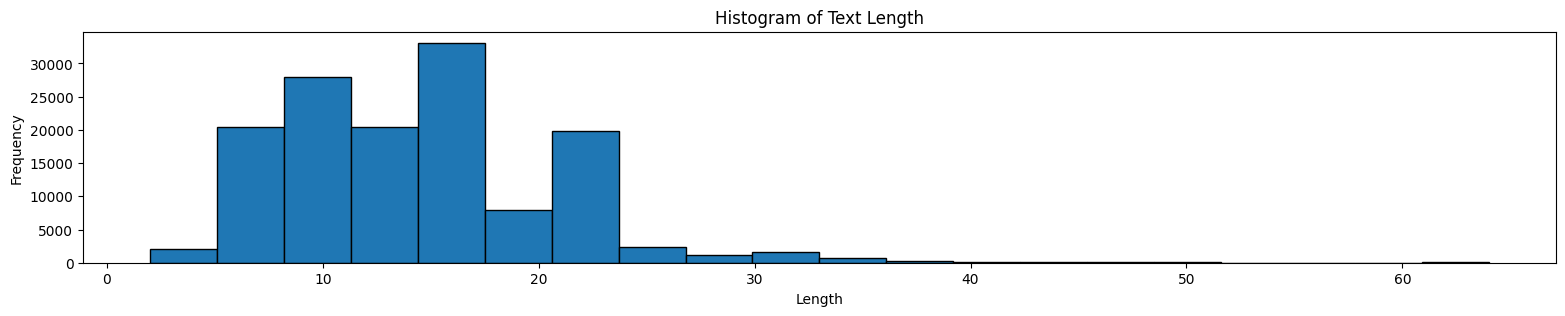

In [264]:
d['Length']=d['ConnectionOrg'].apply(len)
display(d[['ConnectionOrg', 'Length']].sort_values(by = 'Length', ascending = False).head())

#distribution of the data
plt.figure(figsize = (19, 3))
plt.hist(d['Length'], bins=20, edgecolor='black')
plt.title('Histogram of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

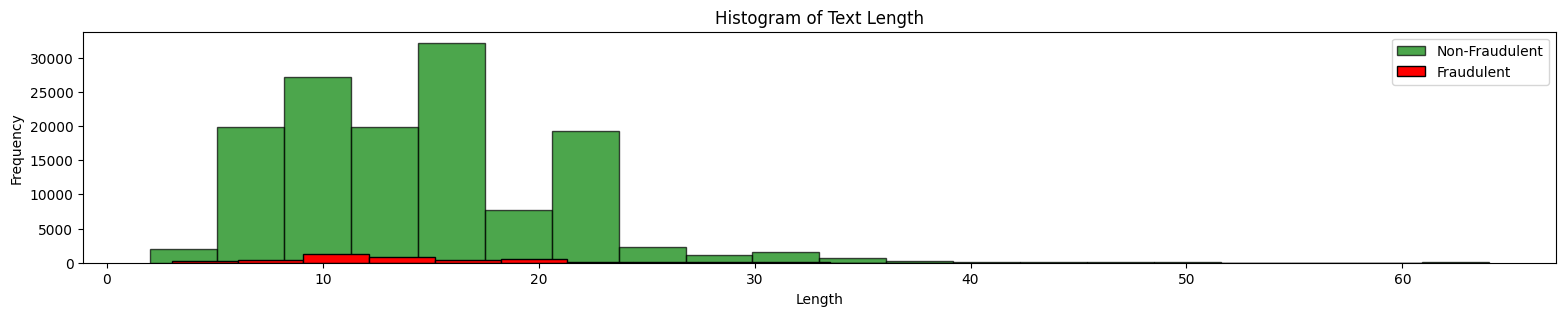

In [265]:
plt.figure(figsize = (19, 3))
# Plot for non-fraudulent and fraudulent cases respectively.
plt.hist(d[d['Fraud'] == 0]['Length'], bins=20, edgecolor='black', color='green', alpha=0.7, label='Non-Fraudulent')
plt.hist(d[d['Fraud'] == 1]['Length'], bins=20, edgecolor='black', color='red', alpha=1.0, label='Fraudulent')
plt.title('Histogram of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [266]:
temp_ = d[['ConnectionOrg', 'Length']][d['Length'] > 40]
temp_

,ConnectionOrg,Length
140,16f ocean centre canton road tsimshatsui kl,43
141,16f ocean centre canton road tsimshatsui kl,43
142,16f ocean centre canton road tsimshatsui kl,43
500,abu dhabi system and information center adsic,45
1088,aircel limited dlf cyber city building no 10 a...,62
...,...,...
135898,wcp32points intermediate holding company inc,44
136903,wilson elser moskowitz edelman e dicker llp,43
136904,wilson elser moskowitz edelman e dicker llp,43
137973,ziggo lgi internal cgnat for ipv4ipv6 aftr,42


In [267]:
d['ConnectionOrg'] = d['ConnectionOrg'].replace('Venezuela Services/Communication', 'VZ Serv/Comms')

In [268]:
res = pd.crosstab(temp_['ConnectionOrg'], d['Fraud'], margins=True, margins_name='Total')
res.sort_values(by='Total', ascending=False)

Fraud,0,1,Total
ConnectionOrg,,,
Total,419,19,438
compa a dominicana de tel fonos c por a codetel,47,0,47
ipv4 address block not managed by the ripe ncc,17,0,17
national aeronautics and space administration,15,0,15
united state cellular telephone company greater knoxville l,11,0,11
...,...,...,...
station d ecologie experimentale de moulis cnrs,1,0,1
steam broadcasting and communication limited,1,0,1
suffolk county department of civil service,1,0,1


In [269]:
big_names = temp_['ConnectionOrg'].value_counts().index
d['ConnectionOrg'] = np.where(d['ConnectionOrg'].isin(big_names), 'Big_name_org', d['ConnectionOrg'])

In [270]:
temp_ = d[['ConnectionOrg', 'Length']][d['Length'] > 30]
temp_

,ConnectionOrg,Length
117,10vaqw 1199 seiu national benefit fund,38
118,10vaqw 1199 seiu national benefit fund,38
119,10vaqw 1199 seiu national benefit fund,38
120,10vaqw 1199 seiu national benefit fund,38
121,10vaqw 1199 seiu national benefit fund,38
...,...,...
137801,yigany interian02212013112425234,32
137802,yigany interian02212013112425234,32
137803,yigany interian02212013112425234,32
137973,Big_name_org,42


In [271]:
big_names = temp_['ConnectionOrg'].value_counts().index
d['ConnectionOrg'] = np.where(d['ConnectionOrg'].isin(big_names), 'Mid_name_org', d['ConnectionOrg'])

In [272]:
temp_ = d[['ConnectionOrg', 'Length']][d['Length'] > 25]
temp_

,ConnectionOrg,Length
46,012 smile communication ltd,27
47,012 smile communication ltd,27
48,012 smile communication ltd,27
117,Mid_name_org,38
118,Mid_name_org,38
...,...,...
137803,Mid_name_org,32
137828,yvette mauer02122013175145651,29
137955,zennoh grain corpcgb enterpr,28
137973,Mid_name_org,42


In [273]:
d['ConnectionOrg'] = d['ConnectionOrg'].replace('Department Of Education System', 'Dpt. Edu. Sys.')

In [274]:
res = pd.crosstab(temp_['ConnectionOrg'], d['Fraud'], margins=True, margins_name='Total')
res.sort_values(by='Total', ascending=False)

Fraud,0,1,Total
ConnectionOrg,,,
Total,4519,131,4650
Mid_name_org,2452,75,2527
Department Of Education System,300,11,311
pricewaterhousecoopers llp,63,3,66
lightower fiber network i llc,61,2,63
...,...,...,...
brookfieldts lp by it managi,1,0,1
broadstone real estate llc,1,0,1
northwoods consulting partner,1,0,1


In [275]:
big_names = temp_['ConnectionOrg'].value_counts().index
d['ConnectionOrg'] = np.where(d['ConnectionOrg'].isin(big_names), 'short_name_org', d['ConnectionOrg'])

In [276]:
a=  d['ConnectionOrg'].value_counts()
a[a <= 100]

Son Inc                     97
lion resource inc           81
taipei taiwan               80
pilot fiber inc             74
logicweb inc                73
                            ..
caresoft global inc          1
bhn cfl division             1
prairienet                   1
pppoe                        1
california milk advisory     1
Name: ConnectionOrg, Length: 3972, dtype: int64

In [277]:
vc = d['ConnectionOrg'].value_counts()
mask = vc <= 100
other_values = vc[mask].index

d['ConnectionOrg'] = np.where(d['ConnectionOrg'].isin(other_values), 'Others', d['ConnectionOrg'])

In [278]:
d['ConnectionOrg'].value_counts().head(60)

Comcast Company             24997
Time Warner                 15639
Others                      14964
ATT Internet Services       12298
Services INC                 6805
Mobiles                      6263
Optimum                      5424
Cox Communications           5264
short_name_org               4339
ATT mobility                 3671
Cellco                       3518
Universities                 2929
Sprint Pop                   2780
charter communication        2546
Frontier Communications      2517
Company llc                  1793
Corporations                 1718
psinet inc                   1507
Telecom                      1320
rcn                          1256
jpmorgan chase co            1242
communication Inc            1229
HealthCare                   1134
Cable-Vision/Tv               829
zscaler inc                   718
Bright House                  710
Wide Open West                650
suddenlink communication      616
BroadBands                    569
Services LLC  

In [279]:
target_string = 'inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Incorporated Orgs'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [280]:
target_string = 'Inc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Incorporated Orgs'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


Incorporated Orgs    3044
communication Inc    1229
System Inc            285
Tech Inc              227
Network Inc           189
Group Inc             159
Name: ConnectionOrg, dtype: int64


In [281]:
d['ConnectionOrg'] = d['ConnectionOrg'].replace('Cellco', 'Cell co')

In [282]:
target_string = 'llc'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'LLCs'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)


Company llc          1793
Communication llc     199
Group llc             162
Network llc           104
Name: ConnectionOrg, dtype: int64


In [283]:
target_string = 'Communications'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Communications'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [284]:
target_string = 'communication'
d['FuzzPartialRatio'] = d['ConnectionOrg'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio'] == 100][['FuzzPartialRatio', 'ConnectionOrg']]
# print(f"\n{gib['ConnectionOrg'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio'] == 100]['ConnectionOrg'].value_counts()
word = 'Communications'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['ConnectionOrg'] = d['ConnectionOrg'].replace(comcast_mapping)

In [285]:
len(d['ConnectionOrg'].value_counts())

50

In [286]:
# Because they're are of same Organization
d['ConnectionOrg'] = d['ConnectionOrg'].replace('ATT mobility', 'ATT Internet Services')

##### Fuzz-wuzzy (End)

,ConnectionOrg,Length
72113,illinois century network,24
72110,illinois century network,24
72097,illinois century network,24
72098,illinois century network,24
72099,illinois century network,24


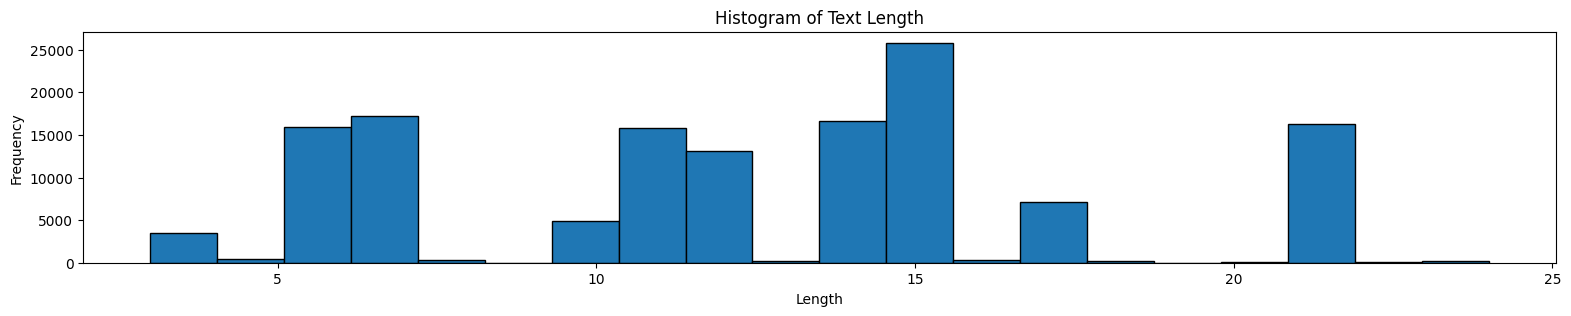

In [287]:
d['Length']=d['ConnectionOrg'].apply(len)
display(d[['ConnectionOrg', 'Length']].sort_values(by = 'Length', ascending = False).head())

#distribution of the data
plt.figure(figsize = (19, 3))
plt.hist(d['Length'], bins=20, edgecolor='black')
plt.title('Histogram of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

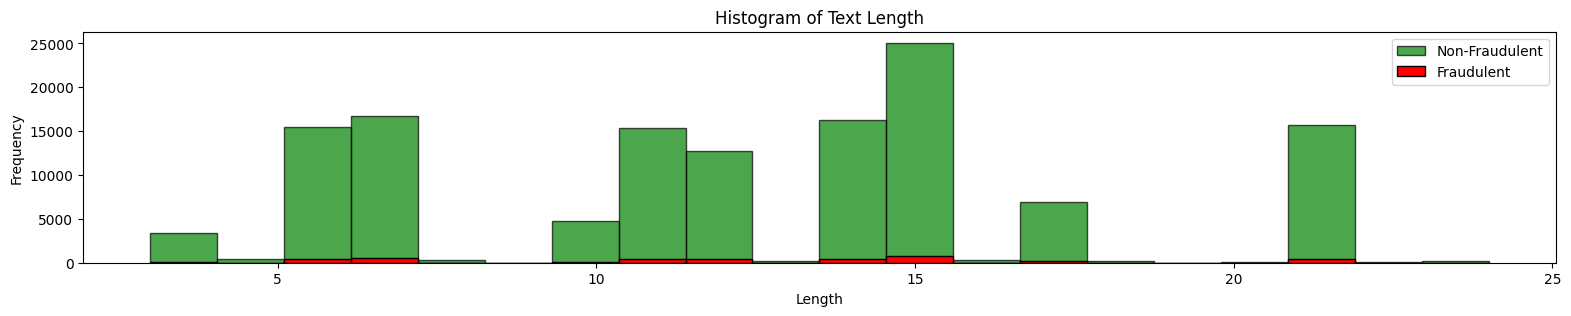

In [288]:
plt.figure(figsize = (19, 3))
# Plot for non-fraudulent and fraudulent cases respectively.
plt.hist(d[d['Fraud'] == 0]['Length'], bins=20, edgecolor='black', color='green', alpha=0.7, label='Non-Fraudulent')
plt.hist(d[d['Fraud'] == 1]['Length'], bins=20, edgecolor='black', color='red', alpha=1.0, label='Fraudulent')
plt.title('Histogram of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [289]:
dirty = d[['ConnectionOrg']]
enc = GapEncoder()
d_enc = enc.fit_transform(dirty)

In [290]:
topic_labels = enc.get_feature_names_out(n_labels=15)
for k, labels in enumerate(topic_labels):
    print(f"Topic n°{k}: {labels}")

Topic n°0: broadbands, banks, schools, healthcare, llcs, college, management, pppox, llc, bandwidth, usa, pool, ltd, bright, misc
Topic n°1: company, financial, cell, insurance, telecom, co, comcast, century, telemic, customers, rcn, access, de, cv, wide
Topic n°2: att, sprint, century, chase, rcn, telemic, west, access, internet, fuse, chinese, cv, de, wide, ca
Topic n°3: internet, warner, amazon, network, sprint, att, new, century, american, rcn, open, america, wide, de, cv
Topic n°4: incorporated, yorks, corporaci, corp, orgs, inc, corporations, new, pop, zayo, private, network, edu, motors, pool
Topic n°5: vision, universities, static, communications, america, american, ca, west, cable, amazon, optimum, time, corporations, comcast, tv
Topic n°6: services, access, chinese, chase, fuse, west, sprint, rcn, illinois, att, house, hughes, internet, new, cv
Topic n°7: others, motors, customers, hughes, bandwidth, rcn, universities, healthcare, ltd, de, cv, wide, open, sa, tv
Topic n°8: sh

In [291]:
Education = ['Universities', 'Schools', 'Dpt. Edu. Sys.', 'College']
d['ConnectionOrg'] = d['ConnectionOrg'].replace(Education, 'Educational Org')

In [292]:
# Cols to drop, length, FuzzRatio at the end of this section

#### Similarity-Encoder

In [293]:
# Just like how you use OneHotEncoding from sklearn.preprocessing
# Similary, just use, from dirty_cat import SimilarityEncoder
# But it takes crazy level of computational power, we don't wanna risk losing our processor chip. It'll start to fry, lmao

### Checkpoint-5 (V6CF)


In [294]:
# Atleast for now, we're good to go. let's move on to the next variable

In [295]:
numerical_col = d.select_dtypes(exclude=['object'])
numerical_col.sample(5)

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,IsOldDevice,MainEntityUse,Fraud,TransactionDay,TransactionMonth,AddressUpdateDay,AddressUpdateMonth,AddressUpdateYear,EmailUpdateDay,EmailUpdateMonth,EmailUpdateYear,Length,FuzzRatio,FuzzPartialRatio
76792,99,88,90,618,45300,0.0,1.0,351.0,0,31,5,6,10,2012,8,6,2008,14,34,23
34344,99,94,77,501,35620,631.0,1.0,375.0,0,31,5,30,11,2007,3,9,2005,15,37,54
104396,99,88,10,501,16980,312.0,1.0,98.0,0,27,5,31,10,2012,4,4,2008,10,24,27
119920,99,97,90,535,14060,404.0,1.0,417.0,0,26,5,20,4,2012,28,9,2012,11,22,32
14249,76,95,66,0,33100,805.0,1.0,387.0,0,30,5,29,6,2012,14,4,2004,21,7,23


In [296]:
categorical_col = d.select_dtypes(exclude=['int64','float'])
categorical_col.sample(5)

,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,webSessOS,webSessWebBrowser,Region,State,Country,TransactionTimeOfDay,AddressUpdateTimeOfDay,EmailUpdateTimeOfDay
97397,LLCs,cable,medium,net,KOL,Windows 10,Chrome,south central,louisiana,us,Evening,Morning,Morning
80,BroadBands,dsl,medium,net,K45,Mac OS X,IE Mobile,southeast,mississippi,us,Morning,Evening,Afternoon
89066,Optimum,cable,medium,net,SOA,Android,Chrome Mobile,great lakes,illinois,us,Afternoon,Afternoon,Night
119590,Time Warner,dsl,medium,net,SOA,Windows 10,Chrome,southwest,california,us,Evening,Night,Night
91609,Optimum,tx,medium,com,KOL,Windows 10,Firefox,northeast,new york,us,Night,Afternoon,Afternoon


In [297]:
d[d['V6CF'] == 'unknown'].shape

(17285, 33)

In [298]:
d2 = d.copy()
for column in d2.columns:
    # Iterating columns and replacing 'unknown' with NaN
    d2[column] = d2[column].replace('unknown', np.nan)
    nan_count = d2[column].isnull().sum()
    if nan_count > 0:
        print(f"Column: {column}, NaN Count: {nan_count}")

Column: ConnectionType, NaN Count: 4927
Column: ConnectionSpeed, NaN Count: 4991
Column: V6CF, NaN Count: 17285


In [299]:
# Simple Imputer is univariate: Univariate imputation implies that we are only considering the values of a single column when performing imputation.
# Itterative and KNN imputer uses Multivariate: uses all other features into account for imputing missing values
# Missing Completely at Random - if the data is missing 5%, we're told to impute with Mean or Median. And for categorical features, we use Mode (Most Frequently occuring value)
# We can either label unknown or NaN values as 'Missing' or keep it as it is.

In [300]:
missing_val_cols = [col for col in d2.columns if d2[col].isnull().any()]
missing_val_cols

['ConnectionType', 'ConnectionSpeed', 'V6CF']

In [301]:
obj_cols = d.select_dtypes(include = 'object').columns

In [302]:
# Iterative Imputer is the best choice, becasue it captures the relationship of other variables, but the problem is:
# Our data is Categorical, and encoding them, and filling nulls won't be a good idea
# The KNN Imputation can be considered here, but it really sucks with high-dimensional data, which is less likely to fill perfect values.
# Let's first check the correlation between the categorical variables, if correlation exist, we'll use predictive model to impute those missing values or anyother imputation technique
le = LabelEncoder()
d_encoded = d[obj_cols].apply(le.fit_transform)

# Since, these are categorical variables, we use Cramér's V for each pair.
cramer_vs = pd.DataFrame(index = obj_cols, columns = obj_cols)

In [303]:
from scipy.stats import chi2_contingency
for i in obj_cols:
    for j in obj_cols:
        confusion_matrix = pd.crosstab(d_encoded[i], d_encoded[j])
        chi2, _, _, _ = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
        cramer_vs.loc[i, j] = cramers_v

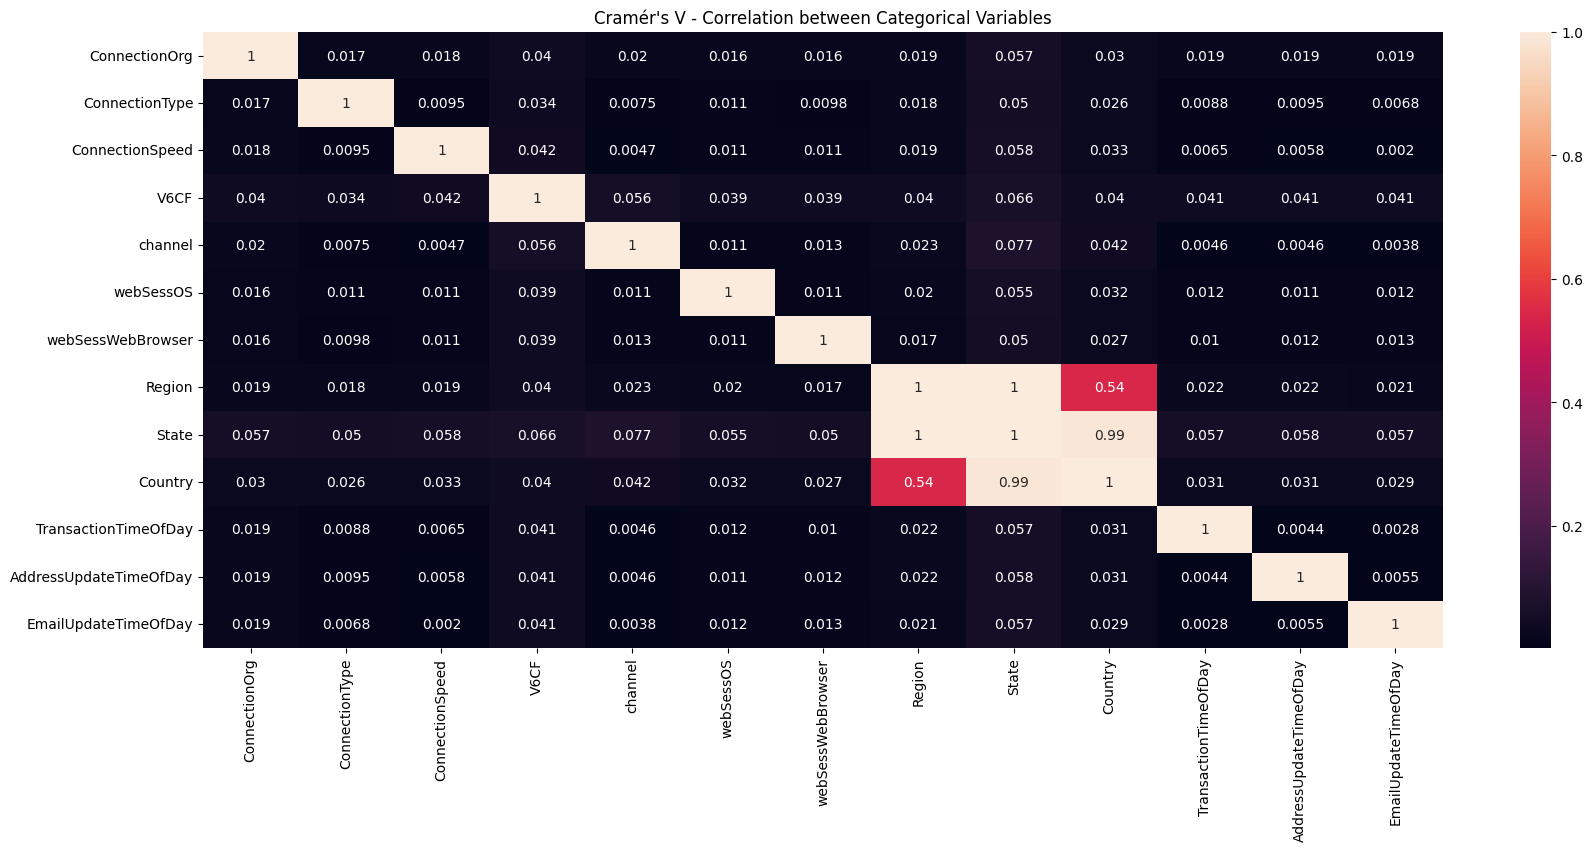

In [304]:
# TypeError: Image data of dtype object cannot be converted to float, that's why turning float
cramer_vs = cramer_vs.astype(float)
plt.figure(figsize=(20, 8))
sns.heatmap(cramer_vs, annot=True)
plt.title("Cramér's V - Correlation between Categorical Variables")
plt.show()

In [305]:
# Well, Country, Region, and State are highly correlated to each other. But its not that what really matters now, let's impute those missing values.
# OR we can simply keep it, as it is.
# Why aren't we using predictive model? Most of these columns are constrast to each other.
# https://feature-engine.trainindata.com/en/latest/
# !pip install feature-engine

In [306]:
# It seems this column represents as domain names (Top-lvl-domains)
d['V6CF'].value_counts()

net         73809
com         39562
unknown     17285
edu          2795
org          1310
            ...  
new-york        1
co.il           1
mn.us           1
com.uy          1
com.bz          1
Name: V6CF, Length: 231, dtype: int64

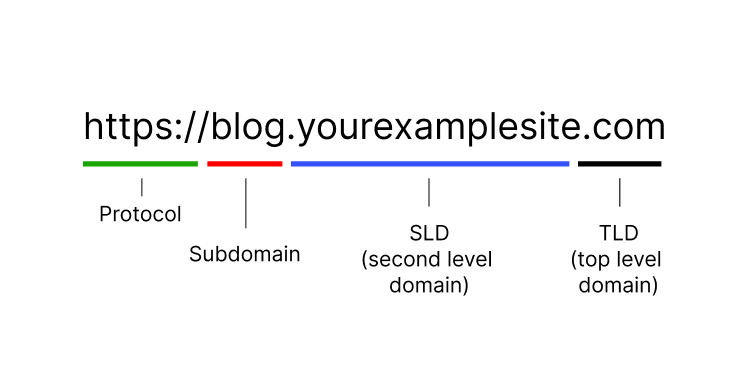

##### Fuzzy-Wuzzy (Start)

In [307]:
# As we did it for the ConnectionOrg col, we can try it on this as well.
target_string = 'net'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
d['FuzzPartialRatio_v6cf'].sort_values(ascending = False)

0         100
78584     100
78606     100
78602     100
78598     100
         ... 
105713      0
72965       0
72964       0
72962       0
93611       0
Name: FuzzPartialRatio_v6cf, Length: 138372, dtype: int64

In [308]:
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]

In [309]:
target_string = 'net.'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
print(f"\n{gib['V6CF'].value_counts()}")


net       73809
net.mx       85
net.co       85
net.ve       81
net.il       54
net.do       48
net.ar       25
net.br       23
net.au       17
net.uy       15
net.sg       14
net.id        9
net.my        8
net.ni        7
net.ua        6
net.pl        5
net.tw        5
net.uk        5
net.pe        4
net.in        4
net.pk        4
net.nz        3
net.ec        3
net.cn        3
net.hk        2
net.ae        2
Name: V6CF, dtype: int64


In [310]:
#
target_string = 'net.'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'net.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)


net       73809
net.mx       85
net.co       85
net.ve       81
net.il       54
net.do       48
net.ar       25
net.br       23
net.au       17
net.uy       15
net.sg       14
net.id        9
net.my        8
net.ni        7
net.ua        6
net.pl        5
net.tw        5
net.uk        5
net.pe        4
net.in        4
net.pk        4
net.nz        3
net.ec        3
net.cn        3
net.hk        2
net.ae        2
Name: V6CF, dtype: int64


In [311]:
target_string = 'com.'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'com.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)


com       39562
com.mx      261
com.br       69
com.ar       64
com.cn       57
com.au       41
com.ve       32
com.tr       18
com.sg       12
com.ec        9
com.gh        7
com.qa        6
co            5
com.ni        5
com.hk        5
com.tw        4
com.ph        4
com.co        3
com.pe        3
com.sa        3
com.ng        2
com.my        2
com.fj        1
com.uy        1
com.bn        1
com.py        1
com.bz        1
Name: V6CF, dtype: int64


In [312]:
target_string = 'edu'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
# print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'edu.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)

In [313]:
target_string = 'co.'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
# print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'co.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)

In [314]:
target_string = 'gov'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'gov.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)


gov        548
gov.ng       3
govt.nz      2
gov.tt       2
gov.jm       2
Name: V6CF, dtype: int64


In [315]:
target_string = 'us'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'US TLDs'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)


us       147
ca.us     67
il.us     28
tx.us     26
oh.us     25
fl.us     23
ny.us     21
nj.us     15
ga.us     14
mi.us     13
in.us     13
la.us      9
or.us      7
ky.us      6
md.us      6
nv.us      5
ct.us      4
wi.us      4
ma.us      3
nd.us      3
sc.us      2
az.us      2
va.us      2
wv.us      2
wa.us      1
ks.us      1
mn.us      1
Name: V6CF, dtype: int64


In [316]:
target_string = '.jp'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
# print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'JP TLDs'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)

In [317]:
target_string = '.ca'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
# print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'CA TLDs'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)

In [318]:
target_string = 'org'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'org.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)


org       1310
org.pa       3
org.uk       1
Name: V6CF, dtype: int64


In [319]:
target_string = 'ac.'
d['FuzzPartialRatio_v6cf'] = d['V6CF'].apply(calculate_fuzz_partial_ratio)
gib = d[d['FuzzPartialRatio_v6cf'] == 100][['FuzzPartialRatio_v6cf', 'V6CF']]
# print(f"\n{gib['V6CF'].value_counts()}")

gib_vc = d[d['FuzzPartialRatio_v6cf'] == 100]['V6CF'].value_counts()
word = 'ac.'
og_word = gib_vc.index.tolist() # Grabs the items
comcast_mapping = dict.fromkeys(og_word, word)
d['V6CF'] = d['V6CF'].replace(comcast_mapping)

##### Fuzzy-Wuzzy (End?)

In [320]:
demo = d['V6CF'].value_counts().head(120)
print(demo.head(59))
print(f"\n{demo.tail(60)}")

net.          74326
com.          40179
unknown       17285
edu.           2813
org.           1314
gov.            557
US TLDs         450
co.             156
mil             114
de              107
CA TLDs         100
fr               97
configured       70
it               69
JP TLDs          52
in               50
biz              32
ru               29
gr               29
ch               28
nl               25
pl               25
be               23
cl               23
pt               23
ec               22
spoofed          21
ac.              14
hn               13
io               11
info             11
gt               11
ro               11
hu               11
ie               10
eu               10
available        10
fi                8
63                7
es                7
ws                7
cn                7
ve                7
cz                7
rs                7
la                6
vi                6
jo                6
at                6
me                6


In [321]:
misc_num = vc.index.tolist()
d['V6CF'] = d['V6CF'].apply(lambda x: 'misc_num' if x in misc_num else x)

In [322]:
demo = d['V6CF'].value_counts().head(120)
print(demo.head(59))
print(f"\n{demo.tail(60)}")

net.          74326
com.          40179
misc_num      17287
edu.           2813
org.           1314
gov.            557
US TLDs         450
co.             156
mil             114
de              107
CA TLDs         100
fr               97
configured       70
it               69
JP TLDs          52
in               50
biz              32
ru               29
gr               29
ch               28
nl               25
pl               25
be               23
cl               23
pt               23
ec               22
spoofed          21
ac.              14
hn               13
ro               11
hu               11
info             11
io               11
gt               11
eu               10
available        10
ie               10
fi                8
cz                7
rs                7
cn                7
ve                7
es                7
ws                7
63                7
vi                6
la                6
me                6
sx                6
jo                6


In [323]:
vc = d['V6CF'].value_counts()
lc = vc[vc < 50].index.tolist()
lc

['biz',
 'ru',
 'gr',
 'ch',
 'nl',
 'pl',
 'be',
 'cl',
 'pt',
 'ec',
 'spoofed',
 'ac.',
 'hn',
 'ro',
 'hu',
 'info',
 'io',
 'gt',
 'eu',
 'available',
 'ie',
 'fi',
 'cz',
 'rs',
 'cn',
 've',
 'es',
 'ws',
 '63',
 'vi',
 'la',
 'me',
 'sx',
 'jo',
 'coop',
 'lu',
 'vn',
 'at',
 'al',
 'se',
 'am',
 'hr',
 'ua',
 'gy',
 'cr',
 'ee',
 'mx',
 'bo',
 'tv',
 'md',
 'no',
 'strong-px1',
 '80',
 'kr',
 'xyz',
 '225',
 'pvt',
 'is',
 'ninja',
 'sk',
 'uk',
 'id',
 'aw',
 'ps',
 'nyc2',
 '192',
 'tk',
 '65',
 'mm',
 '14',
 'ci',
 'dsnet',
 'ae',
 'sg',
 'health',
 'ag',
 'dj',
 'dk',
 'cw',
 'space',
 'localdomain',
 'ba',
 'lnoca',
 'cc',
 'kg',
 'mobi',
 'sl',
 'dvag',
 'new-york',
 'lv',
 'ph',
 'mn',
 'tech',
 'bm',
 'mg',
 'gob.pe',
 'to',
 'tc']

In [324]:
# Let's group em together, values those counts are less than 50
d['V6CF'] = d['V6CF'].apply(lambda x: 'Misc' if x in lc else x)

In [325]:
pd.crosstab(d['V6CF'], d['Fraud'], margins=True, margins_name='Total').sort_values(by='Total', axis=0, ascending=False)

Fraud,0,1,Total
V6CF,,,
Total,134422,3950,138372
net.,72160,2166,74326
com.,39061,1118,40179
misc_num,16803,484,17287
edu.,2740,73,2813
org.,1262,52,1314
Misc,616,15,631
gov.,540,17,557
US TLDs,440,10,450


In [326]:
# Grouping rest of them
other_countries = ['in', 'it', 'fr', 'de']
misc = 'configured'

for country in other_countries:
    d['V6CF'] = np.where(d['V6CF'].str.contains(country), 'other_countries', d['V6CF'])

d['V6CF'] = np.where(d['V6CF'].str.contains(misc), 'Misc', d['V6CF'])

In [327]:
pd.crosstab(d['V6CF'], d['Fraud'], margins=True, margins_name='Total').sort_values(by='Total', axis=0, ascending=False)

Fraud,0,1,Total
V6CF,,,
Total,134422,3950,138372
net.,72160,2166,74326
com.,39061,1118,40179
misc_num,16803,484,17287
edu.,2740,73,2813
org.,1262,52,1314
Misc,685,16,701
gov.,540,17,557
US TLDs,440,10,450


In [328]:
# Looks clean, let's clean up the data by dropping unwanted columns:
cols2drop= ['Length', 'FuzzRatio', 'FuzzPartialRatio', 'FuzzPartialRatio_v6cf']
d.drop(columns=cols2drop, inplace = True)

### Checkpoint-6 (Data Visualization)

In [329]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138372 entries, 0 to 138751
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   V1CF                    138372 non-null  int64  
 1   V2CF                    138372 non-null  int64  
 2   V3CF                    138372 non-null  int64  
 3   V4CF                    138372 non-null  int64  
 4   V5CF                    138372 non-null  int64  
 5   AreaCode                138372 non-null  float64
 6   ConnectionOrg           138372 non-null  object 
 7   ConnectionType          138372 non-null  object 
 8   ConnectionSpeed         138372 non-null  object 
 9   V6CF                    138372 non-null  object 
 10  channel                 138372 non-null  object 
 11  webSessOS               138372 non-null  object 
 12  webSessWebBrowser       138372 non-null  object 
 13  IsOldDevice             138372 non-null  float64
 14  MainEntityUse       

In [330]:
d.describe()

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,IsOldDevice,MainEntityUse,Fraud,TransactionDay,TransactionMonth,AddressUpdateDay,AddressUpdateMonth,AddressUpdateYear,EmailUpdateDay,EmailUpdateMonth,EmailUpdateYear
count,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000,138372.000000
mean,95.532138,78.872510,69.448227,601.011158,27842.177897,494.513054,0.816021,350.960161,0.028546,22.261830,5.239976,16.032275,5.973282,2009.858627,15.480292,6.015784,2008.467992
std,8.171496,25.560634,23.231766,173.493242,11611.896513,263.404540,0.381753,87.688294,0.166528,9.965141,0.624434,8.731522,3.498446,3.327666,8.757801,3.541836,2.987440
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1968.000000,1.000000,1.000000,2001.000000
25%,99.000000,80.000000,66.000000,505.000000,16980.000000,305.000000,1.000000,314.000000,0.000000,22.000000,5.000000,8.000000,3.000000,2008.000000,8.000000,3.000000,2006.000000
50%,99.000000,88.000000,77.000000,602.000000,31100.000000,415.000000,1.000000,370.000000,0.000000,25.000000,5.000000,17.000000,6.000000,2011.000000,16.000000,6.000000,2009.000000
75%,99.000000,95.000000,80.000000,753.000000,35620.000000,713.000000,1.000000,395.000000,0.000000,29.000000,5.000000,23.000000,9.000000,2012.000000,23.000000,9.000000,2011.000000
max,99.000000,99.000000,99.000000,881.000000,49780.000000,979.000000,1.000000,620.000000,1.000000,31.000000,10.000000,31.000000,12.000000,2013.000000,31.000000,12.000000,2013.000000


In [331]:
d.describe(include = 'object')

,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,webSessOS,webSessWebBrowser,Region,State,Country,TransactionTimeOfDay,AddressUpdateTimeOfDay,EmailUpdateTimeOfDay
count,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372
unique,46,11,4,13,4,20,23,64,457,129,4,4,4
top,Comcast Company,cable,medium,net.,SOA,Windows 10,Chrome,southwest,california,us,Afternoon,Night,Afternoon
freq,24997,69870,92582,74326,71746,35957,64452,31257,26095,132838,44991,51285,54484


In [332]:
cred_fraud2 = d[d['Fraud'] == 1][['ConnectionType', 'ConnectionSpeed', 'channel', 'webSessOS', 'webSessWebBrowser', 'V6CF']]
cred_fraud2

,ConnectionType,ConnectionSpeed,channel,webSessOS,webSessWebBrowser,V6CF
27,cable,medium,KOL,Windows 10,Mobile Safari,net.
158,mobile wireless,medium,SOA,Windows 10,Chrome,com.
168,cable,medium,K45,Windows 7,Chrome,net.
177,dsl,medium,SOA,Windows 7,Firefox,net.
233,cable,medium,K45,Windows 7,Chrome,net.
...,...,...,...,...,...,...
138526,mobile wireless,medium,SOA,Windows 10,Mobile Safari,net.
138531,tx,high,SOA,iOS,Chrome,net.
138627,mobile wireless,high,SOA,Android,Chrome,misc_num
138682,cable,medium,KOL,Mac OS X,Chrome,com.


In [333]:
cred_fraud3 = d[d['Fraud'] == 1][['TransactionDay', 'TransactionMonth']]

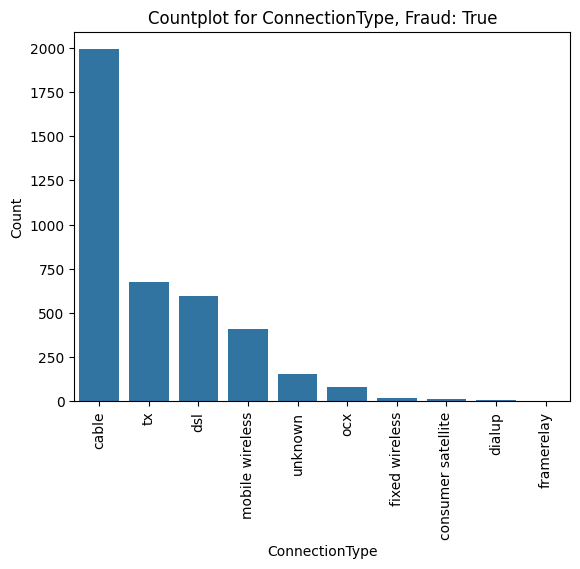

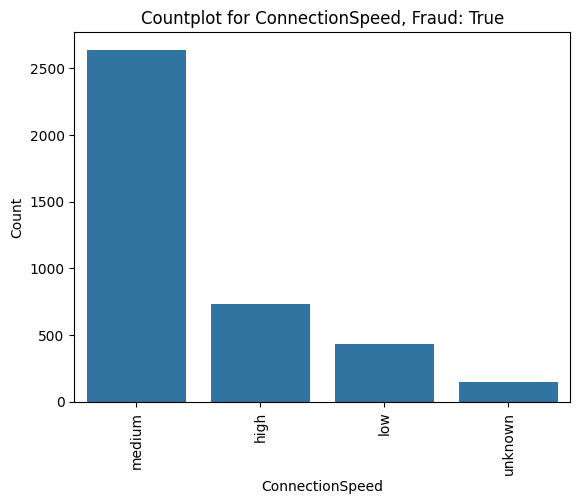

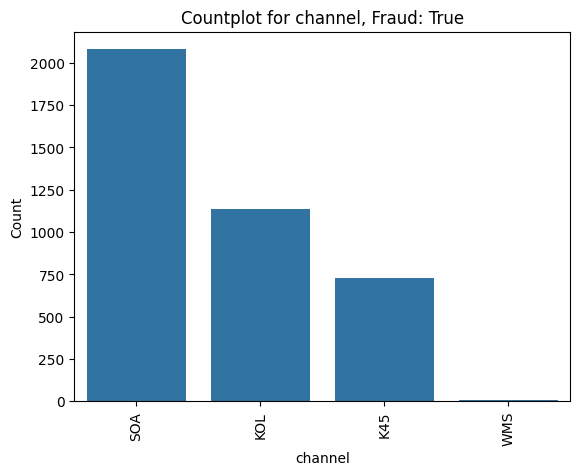

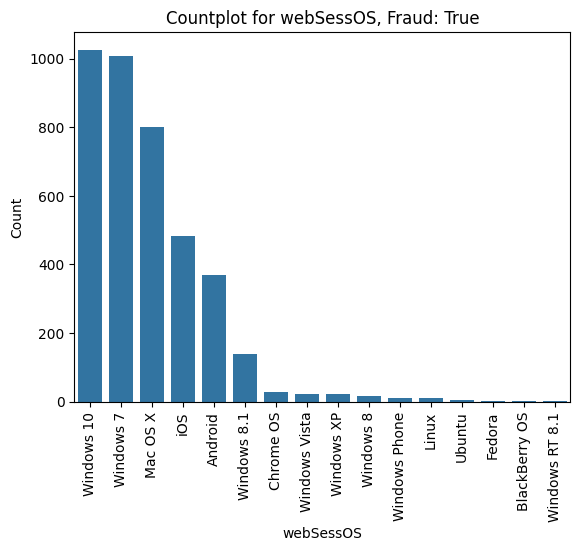

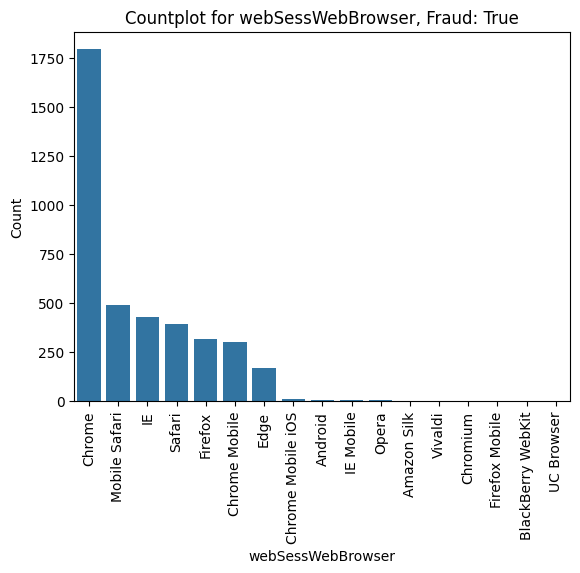

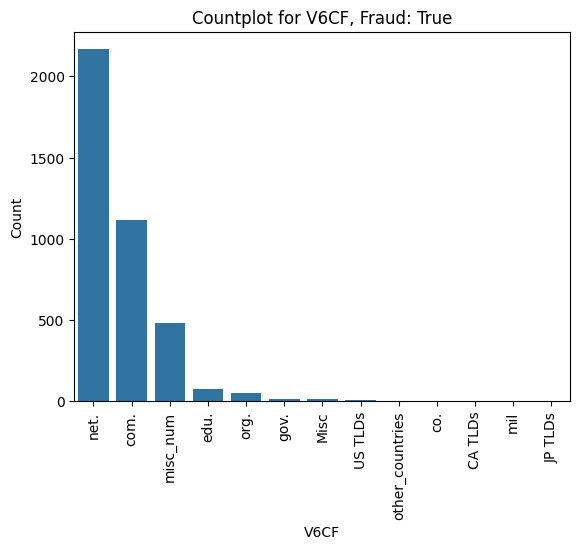

In [334]:
for column in cred_fraud2.columns:
    sns.countplot(x=column, data=cred_fraud2, order=cred_fraud2[column].value_counts().index)
    plt.title(f'Countplot for {column}, Fraud: True')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=-270)
    plt.show()

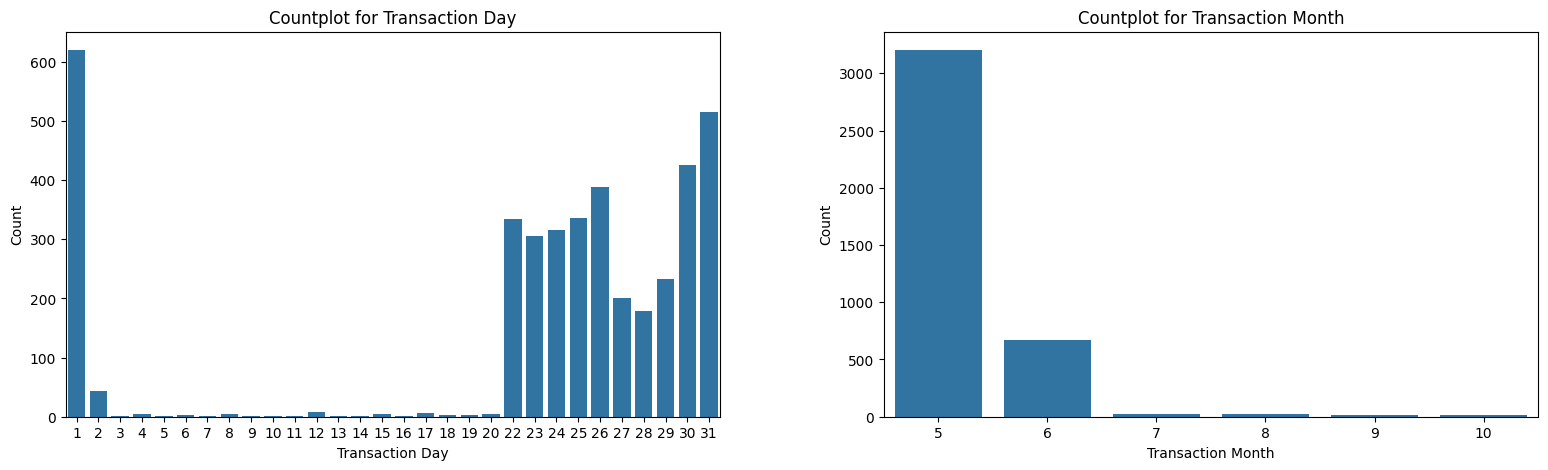

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(19, 5))
plt.subplots_adjust(wspace=0.25)

# TransactionDay
sns.countplot(x='TransactionDay', data=cred_fraud3, ax=axes[0])
axes[0].set_title('Countplot for Transaction Day')
axes[0].set_xlabel('Transaction Day')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x')  # X-axis label rotation

# TransactionMonth
sns.countplot(x='TransactionMonth', data=cred_fraud3, ax=axes[1])
axes[1].set_title('Countplot for Transaction Month')
axes[1].set_xlabel('Transaction Month')
axes[1].set_ylabel('Count')
plt.show()

Maximum number of Transactions made, is on 1st-May, 22nd-May to 31st-May    

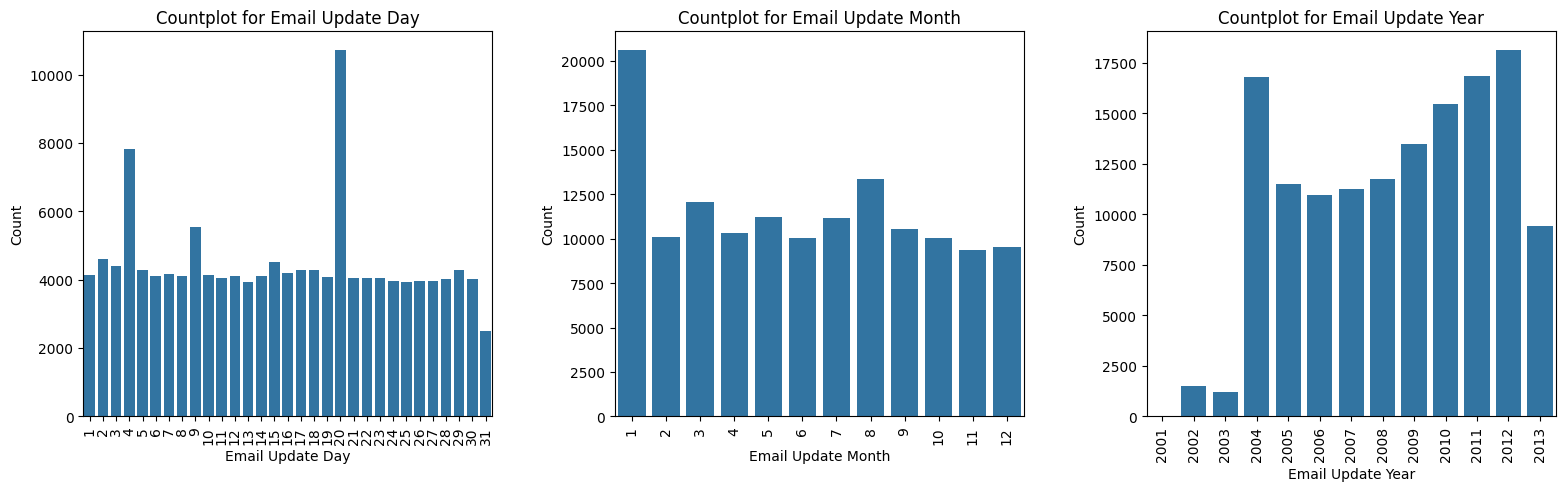

In [336]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5))
plt.subplots_adjust(wspace=0.3)

# EmailUpdateDay
sns.countplot(x='EmailUpdateDay', data=d, ax=axes[0])
axes[0].set_title('Countplot for Email Update Day')
axes[0].set_xlabel('Email Update Day')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=-270)  # Rotates x-axis labels

# EmailUpdateMonth
sns.countplot(x='EmailUpdateMonth', data=d, ax=axes[1])
axes[1].set_title('Countplot for Email Update Month')
axes[1].set_xlabel('Email Update Month')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=-270)  # Rotates x-axis labels

# EmailUpdateYear
sns.countplot(x='EmailUpdateYear', data=d, ax=axes[2])
axes[2].set_title('Countplot for Email Update Year')
axes[2].set_xlabel('Email Update Year')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=-270)  # Rotates x-axis labels
plt.show()

In [337]:
# d[d['EmailUpdateYear']==2001].T

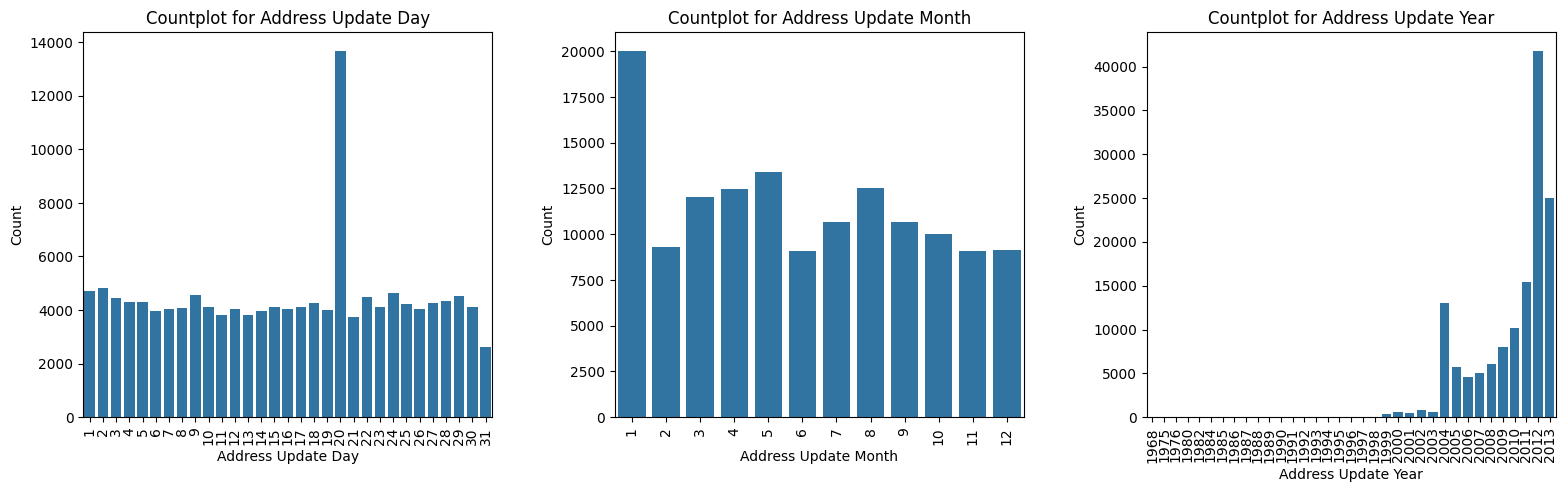

In [338]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5))
plt.subplots_adjust(wspace=0.3)

# AddressUpdateDay
sns.countplot(x='AddressUpdateDay', data=d, ax=axes[0])
axes[0].set_title('Countplot for Address Update Day')
axes[0].set_xlabel('Address Update Day')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=-270)  # Rotate x-axis labels

# AddressUpdateMonth
sns.countplot(x='AddressUpdateMonth', data=d, ax=axes[1])
axes[1].set_title('Countplot for Address Update Month')
axes[1].set_xlabel('Address Update Month')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=-270)  # Rotate x-axis labels

# AddressUpdateYear
sns.countplot(x='AddressUpdateYear', data=d, ax=axes[2])
axes[2].set_title('Countplot for Address Update Year')
axes[2].set_xlabel('Address Update Year')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=-270)  # Rotate x-axis labels
plt.show()

In [339]:
y1 = 1985
y2 = 1985
frauds_before_y1_count = d[(d['AddressUpdateYear'] < y1) & (d['Fraud'] == 1)].shape[0]
not_frauds_before_y2_count = d[(d['AddressUpdateYear'] < y2) & (d['Fraud'] == 0)].shape[0]

print(f'Frauds made before {y1}: {frauds_before_y1_count} records')
print(f'Not frauds made before {y2}: {not_frauds_before_y2_count} records')
# Eh, makes sense, who am I to disagree, only the smarter ones were able to pull-off, lulz
# First fraud made before in 1986, blud changed the address.

Frauds made before 1985: 0 records
Not frauds made before 1985: 39 records


In [340]:
y_cap = 1985
d['AddressUpdateYear'] = np.where(d['AddressUpdateYear'] < y_cap, y_cap, d['AddressUpdateYear'])

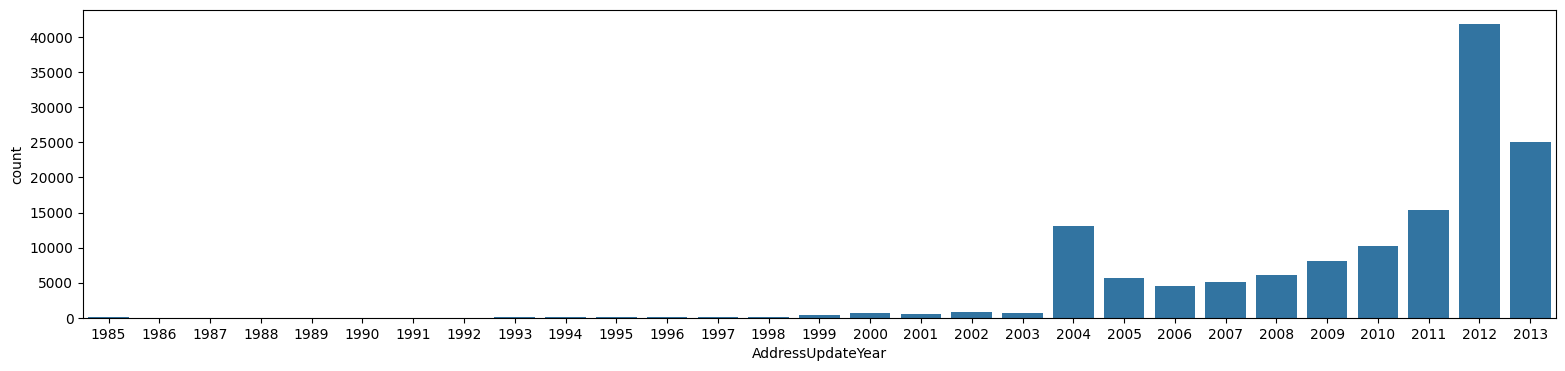

In [341]:
plt.figure(figsize = (19, 4))
sns.countplot(data = d, x = 'AddressUpdateYear')
plt.show()

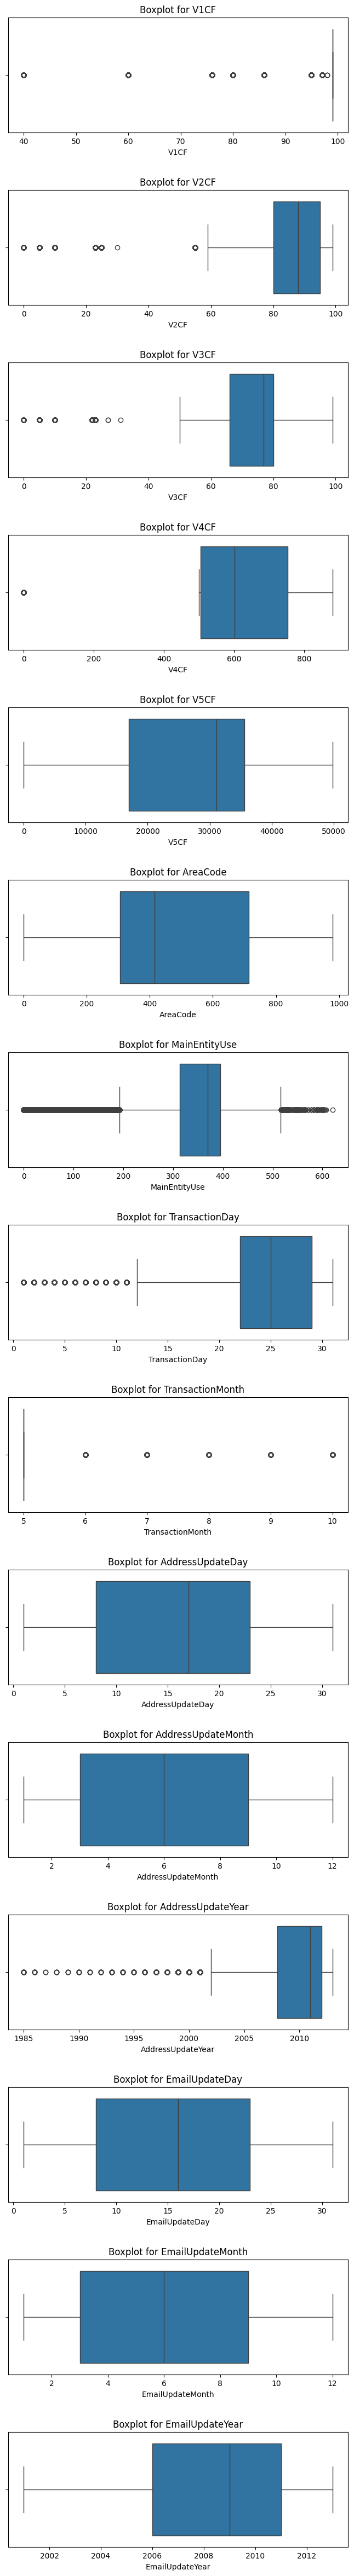

In [342]:
numeric_columns = d.select_dtypes(include=['float64', 'int64']).columns
exclude_columns = ['IsOldDevice', 'Fraud']
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, 4 * len(numeric_columns)))
plt.subplots_adjust(hspace=0.5)  # Adjust the height space between subplots

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=d[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel(column)

plt.show()

In [343]:
print(d['V4CF'].describe())
print(f"\n{d[d['V4CF'] == 0]['V4CF']}")

count    138372.000000
mean        601.011158
std         173.493242
min           0.000000
25%         505.000000
50%         602.000000
75%         753.000000
max         881.000000
Name: V4CF, dtype: float64

3         0
40        0
97        0
99        0
106       0
         ..
138603    0
138639    0
138711    0
138715    0
138735    0
Name: V4CF, Length: 5951, dtype: int64


In [344]:
d.loc[d['V4CF'] == 0, d.columns[:20]].sample(5)

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,webSessOS,webSessWebBrowser,IsOldDevice,MainEntityUse,Fraud,Region,State,Country,TransactionDay
54812,99,94,72,0,31100,317.0,Comcast Company,tx,low,net.,KOL,Mac OS X,Chrome,1.0,392.0,0,great lakes,ohio,us,26
122873,99,71,80,0,16740,323.0,Time Warner,dsl,high,net.,K45,Windows 10,Firefox,1.0,407.0,0,great lakes,illinois,us,25
5384,99,23,10,0,26420,312.0,ATT Internet Services,dsl,medium,net.,KOL,Mac OS X,Edge,1.0,414.0,0,great lakes,illinois,us,27
67136,99,87,77,0,35620,415.0,Communications,mobile wireless,medium,misc_num,SOA,Windows 10,Chrome,1.0,364.0,0,mid atlantic,new jersey,us,30
17896,99,97,89,0,38900,360.0,ATT Internet Services,mobile wireless,medium,net.,K45,Windows 10,Chrome,1.0,459.0,0,mid atlantic,virginia,us,29


In [345]:
d.loc[d['V4CF'] != 0, d.columns[:20]].sample(5)
# Something looks weird, ask bout this col

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,webSessOS,webSessWebBrowser,IsOldDevice,MainEntityUse,Fraud,Region,State,Country,TransactionDay
17301,99,95,95,527,16980,301.0,ATT Internet Services,mobile wireless,medium,net.,KOL,Windows 7,Chrome Mobile,0.0,390.000000,0,midwest,indiana,us,28
44423,99,94,80,501,26660,201.0,Comcast Company,mobile wireless,medium,net.,SOA,Windows 7,IE,1.0,387.000000,0,southeast,georgia,us,31
59200,99,63,23,501,16980,415.0,Communications,tx,high,com.,KOL,Windows 10,Firefox,1.0,389.000000,0,southwest,california,us,22
4206,76,10,66,618,16980,512.0,ATT Internet Services,mobile wireless,medium,com.,SOA,Windows 10,Chrome,1.0,288.000000,0,southeast,georgia,us,22
57567,76,94,90,803,15180,301.0,Communications,tx,medium,net.,SOA,Windows 10,Mobile Safari,1.0,350.894848,0,great lakes,illinois,us,27


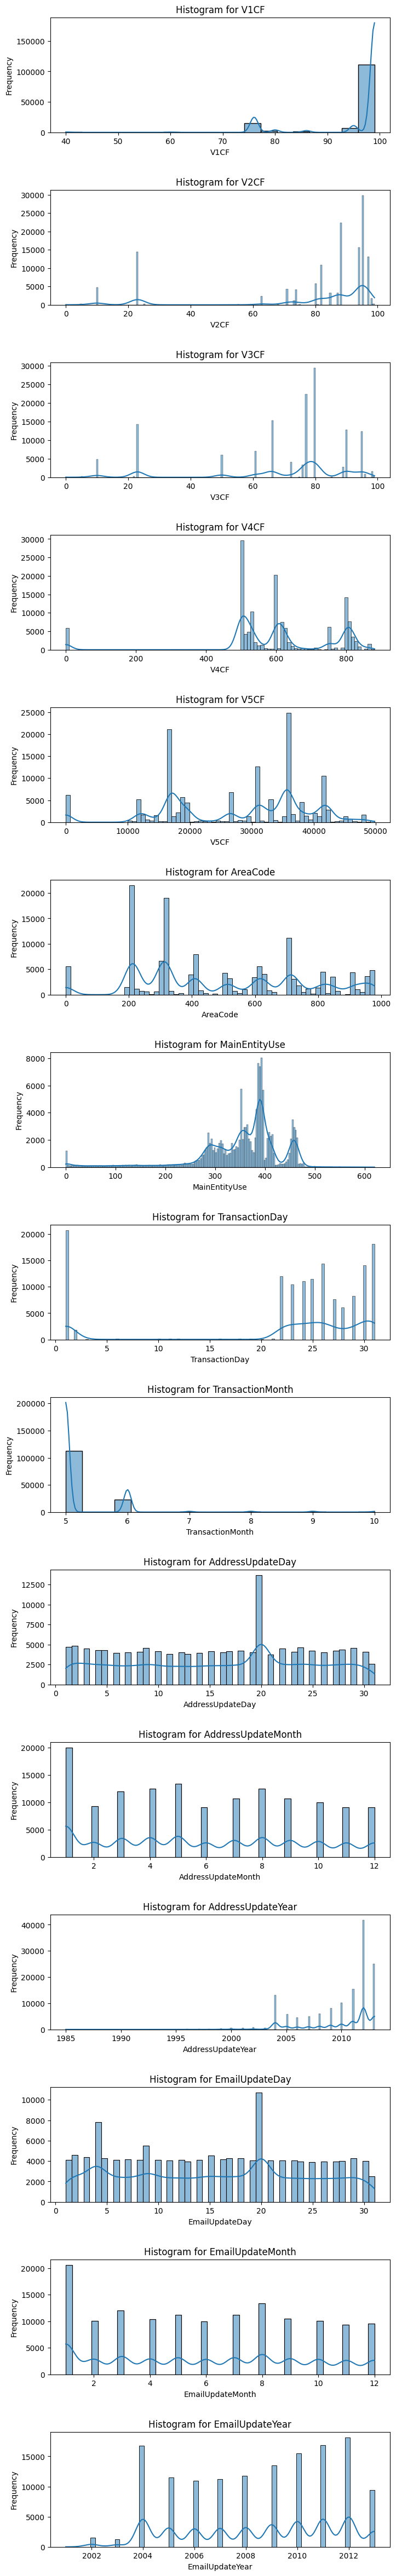

In [346]:
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, 4 * len(numeric_columns)))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    sns.histplot(x=d[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.show()

Most of them are asymmetric. Meaning, not in symmetry or peculiarly bizarre.

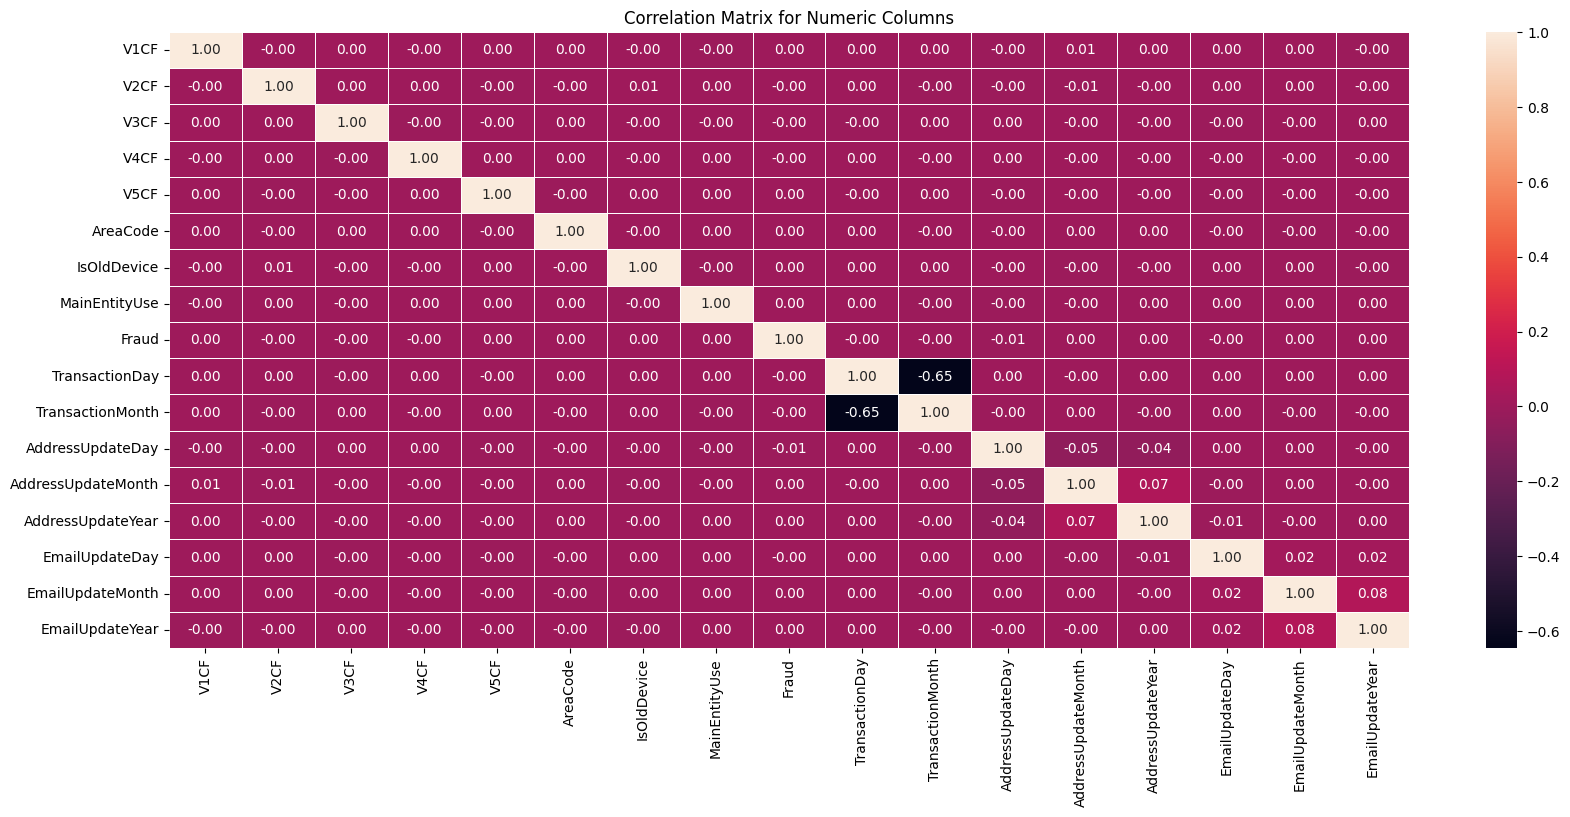

In [347]:
numeric_columns = d.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation_matrix = d[numeric_columns].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

TransactionDay and TransactionMonth are negatively correlated

### Checkpoint-7 (IsOldDevice)

In [348]:
d.nunique().sort_values(ascending = False)

IsOldDevice               3103
MainEntityUse              937
V5CF                       582
State                      457
AreaCode                   254
V4CF                       207
Country                    129
Region                      64
ConnectionOrg               46
AddressUpdateDay            31
TransactionDay              31
EmailUpdateDay              31
V2CF                        29
AddressUpdateYear           29
webSessWebBrowser           23
V3CF                        23
webSessOS                   20
EmailUpdateYear             13
V6CF                        13
AddressUpdateMonth          12
EmailUpdateMonth            12
ConnectionType              11
V1CF                         9
TransactionMonth             6
TransactionTimeOfDay         4
AddressUpdateTimeOfDay       4
EmailUpdateTimeOfDay         4
channel                      4
ConnectionSpeed              4
Fraud                        2
dtype: int64

In [349]:
selected_columns_ = []

for column in d.columns:
    unique_values = d[column].nunique()
    if unique_values < 32:
        selected_columns_.append(column)

print(selected_columns_)

['V1CF', 'V2CF', 'V3CF', 'ConnectionType', 'ConnectionSpeed', 'V6CF', 'channel', 'webSessOS', 'webSessWebBrowser', 'Fraud', 'TransactionDay', 'TransactionMonth', 'AddressUpdateDay', 'AddressUpdateMonth', 'AddressUpdateYear', 'EmailUpdateDay', 'EmailUpdateMonth', 'EmailUpdateYear', 'TransactionTimeOfDay', 'AddressUpdateTimeOfDay', 'EmailUpdateTimeOfDay']


In [350]:
# Dealing with IsOldDevice feature

# counts_ = d['IsOldDevice'].value_counts().to_dict()
# sorted_ = dict(sorted(counts_.items(), key=lambda item: item[1], reverse=True))
# for org, count in sorted_.items():
#     print(f'{org}: {count}', end = ' || ')

# d = d[d['IsOldDevice'].isin([0, 1])]
print(f"{d['IsOldDevice'].value_counts()}")

1.000000    109607
0.000000     24712
0.816284        14
0.815592        13
0.815609        11
             ...  
0.814080         1
0.817598         1
0.816433         1
0.815571         1
0.815101         1
Name: IsOldDevice, Length: 3103, dtype: int64


In [351]:
# d['IsOldDevice'].value_counts().head(60)
# Set 0s and 1s aside
mask = (d['IsOldDevice'] == 0) | (d['IsOldDevice'] == 1)
d['IsOldDevice'] = np.where(mask, d['IsOldDevice'], 1.5)
# Code uses boolean-mask (mask) to identify rows whether it's 0 or 1.
# Then it uses np.where to replace values, if the value is 0 or 1, it remains unchanged; otherwise, it's set to 2
d['IsOldDevice'].value_counts()

1.0    109607
0.0     24712
1.5      4053
Name: IsOldDevice, dtype: int64

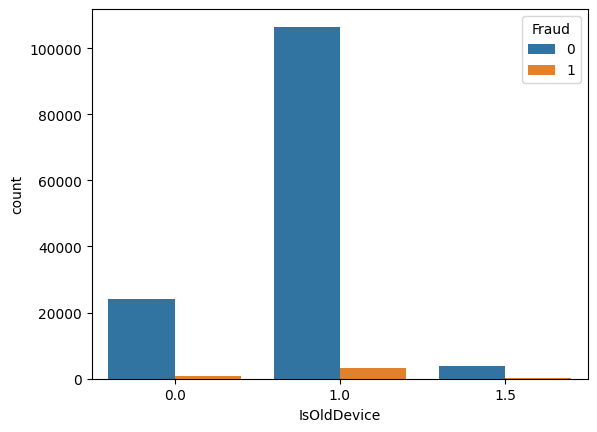

In [352]:
sns.countplot(data = d, hue = 'Fraud', x = 'IsOldDevice')
plt.show()

### Checkpoint-8

In [353]:
# d.info()
d.skew().sort_values(ascending = False)

Fraud                 5.662240
TransactionMonth      4.224039
AreaCode              0.209133
AddressUpdateMonth    0.125801
EmailUpdateMonth      0.089432
EmailUpdateDay        0.018298
AddressUpdateDay     -0.096421
EmailUpdateYear      -0.210526
V5CF                 -0.489997
V3CF                 -1.267970
AddressUpdateYear    -1.327638
V4CF                 -1.389781
TransactionDay       -1.425269
IsOldDevice          -1.455399
MainEntityUse        -1.728804
V2CF                 -1.731873
V1CF                 -2.455693
dtype: float64

In [354]:
dskew = d.skew()
high_skew = dskew[abs(dskew) > 1].index.tolist()

sorted_high_skew = sorted(high_skew, key=lambda x: abs(dskew.loc[x]), reverse=True)
print("Features with high skewness (both positive and negative sorted)")
for feature in sorted_high_skew:
    skewness_value = dskew.loc[feature]
    print(f"{feature}: {round(skewness_value, 4)}")

Features with high skewness (both positive and negative sorted)
Fraud: 5.6622
TransactionMonth: 4.224
V1CF: -2.4557
V2CF: -1.7319
MainEntityUse: -1.7288
IsOldDevice: -1.4554
TransactionDay: -1.4253
V4CF: -1.3898
AddressUpdateYear: -1.3276
V3CF: -1.268


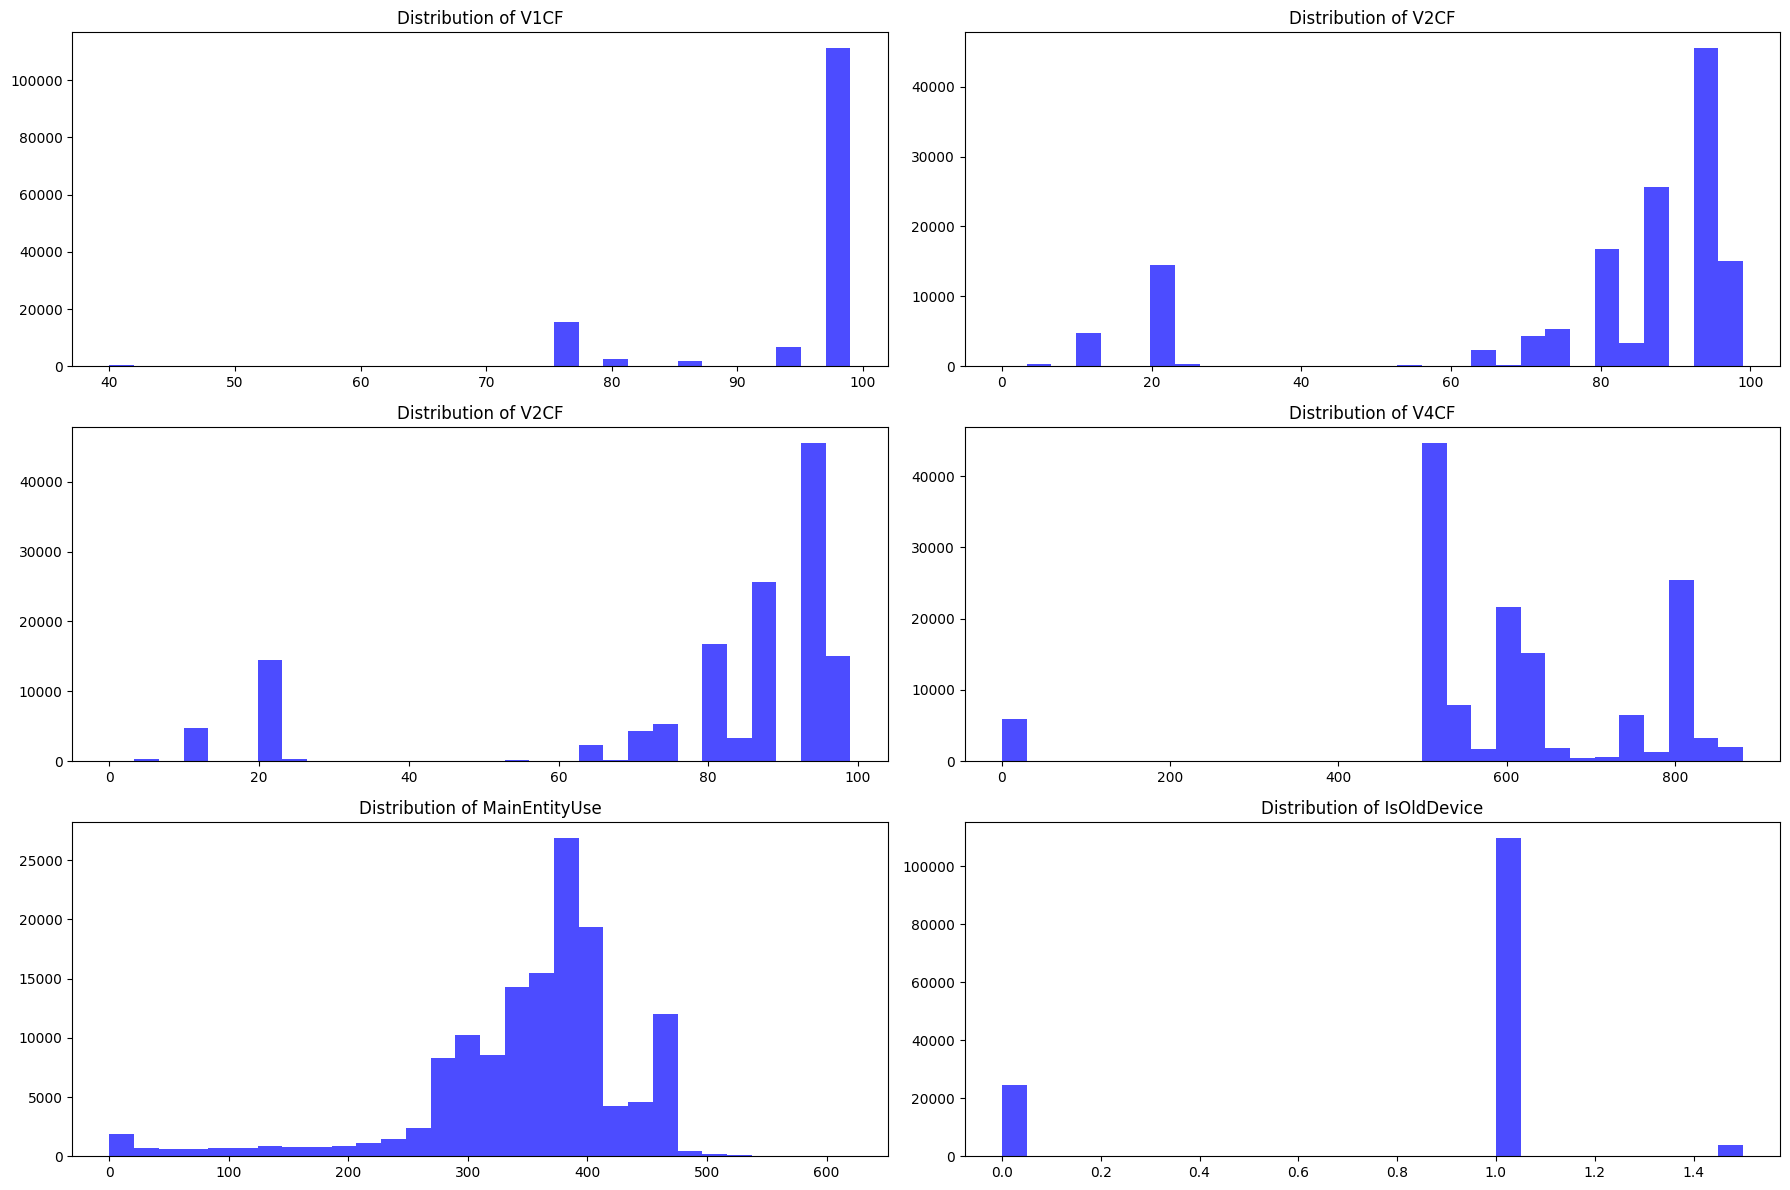

In [355]:
columns_to_transform = ['V1CF', 'V2CF','V2CF', 'V4CF','MainEntityUse', 'IsOldDevice']
plt.figure(figsize=(18, 12))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(3, 2, i)
    plt.hist(d[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Features with the existance of skeness

## Break

In [356]:
def visualize_yeojohnson_transformation(df, column_to_transform):
    # Visualize the original distribution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df[column_to_transform], bins=30, color='blue', alpha=0.7)
    plt.title(f'Original Distribution of {column_to_transform}')

    # Apply Yeo-Johnson transformation
    transformed_column, _ = stats.yeojohnson(df[column_to_transform])
    df[column_to_transform + '_yeojohnson'] = transformed_column

    # Visualize the distribution after transformation
    plt.subplot(1, 2, 2)
    plt.hist(transformed_column, bins=30, color='green', alpha=0.7)
    plt.title(f'Transformed Distribution of {column_to_transform} (Yeo-Johnson)')

    plt.tight_layout()
    plt.show()

In [357]:
for col in d:
  if d[col].dtypes == 'object':
    print(f"{col}\nUnique Values: {d[col].nunique()}\n")

ConnectionOrg
Unique Values: 46

ConnectionType
Unique Values: 11

ConnectionSpeed
Unique Values: 4

V6CF
Unique Values: 13

channel
Unique Values: 4

webSessOS
Unique Values: 20

webSessWebBrowser
Unique Values: 23

Region
Unique Values: 64

State
Unique Values: 457

Country
Unique Values: 129

TransactionTimeOfDay
Unique Values: 4

AddressUpdateTimeOfDay
Unique Values: 4

EmailUpdateTimeOfDay
Unique Values: 4



In [358]:
d.V6CF.value_counts()

net.               74326
com.               40179
misc_num           17287
edu.                2813
org.                1314
Misc                 701
gov.                 557
US TLDs              450
other_countries      323
co.                  156
mil                  114
CA TLDs              100
JP TLDs               52
Name: V6CF, dtype: int64

In [359]:
d['ConnectionOrg'].value_counts()

Comcast Company             24997
ATT Internet Services       15969
Time Warner                 15639
Others                      14964
Communications              11270
Services INC                 6805
Mobiles                      6263
Optimum                      5424
Incorporated Orgs            5133
short_name_org               4339
Educational Org              3976
Cell co                      3518
Sprint Pop                   2780
LLCs                         2258
Corporations                 1718
Telecom                      1320
rcn                          1256
jpmorgan chase co            1242
HealthCare                   1134
Cable-Vision/Tv               829
Bright House                  710
Wide Open West                650
BroadBands                    569
Services LLC                  514
Banks                         404
Insurance Company             370
Amazon                        366
America misc org              356
American Services             351
SA DE CV      

In [360]:
fe = d['ConnectionOrg'].value_counts(normalize=True).to_dict()
d['ConnectionOrg_freq_encoded'] = d['ConnectionOrg'].map(fe)

In [361]:
fe_v6cf = d['V6CF'].value_counts(normalize=True).to_dict()
d['V6CF_freq_encoded'] = d['V6CF'].map(fe_v6cf)

In [362]:
print(d['Region'].value_counts())
print(d['State'].value_counts())
print(d['Country'].value_counts())

southwest              31257
great lakes            30009
northeast              23392
southeast              16211
south central          15788
                       ...  
campania                   2
centre-val de loire        2
pays de la loire           2
grand est                  2
centre-west                1
Name: Region, Length: 64, dtype: int64
california                26095
new york                  21446
illinois                  21075
texas                     13290
florida                    8239
                          ...  
windsor and maidenhead        1
wexford                       1
puebla                        1
aberdeen city                 1
kosicky                       1
Name: State, Length: 457, dtype: int64
us    132838
ve       829
mx       461
gb       392
ca       281
       ...  
lc         1
ci         1
mp         1
fj         1
dj         1
Name: Country, Length: 129, dtype: int64


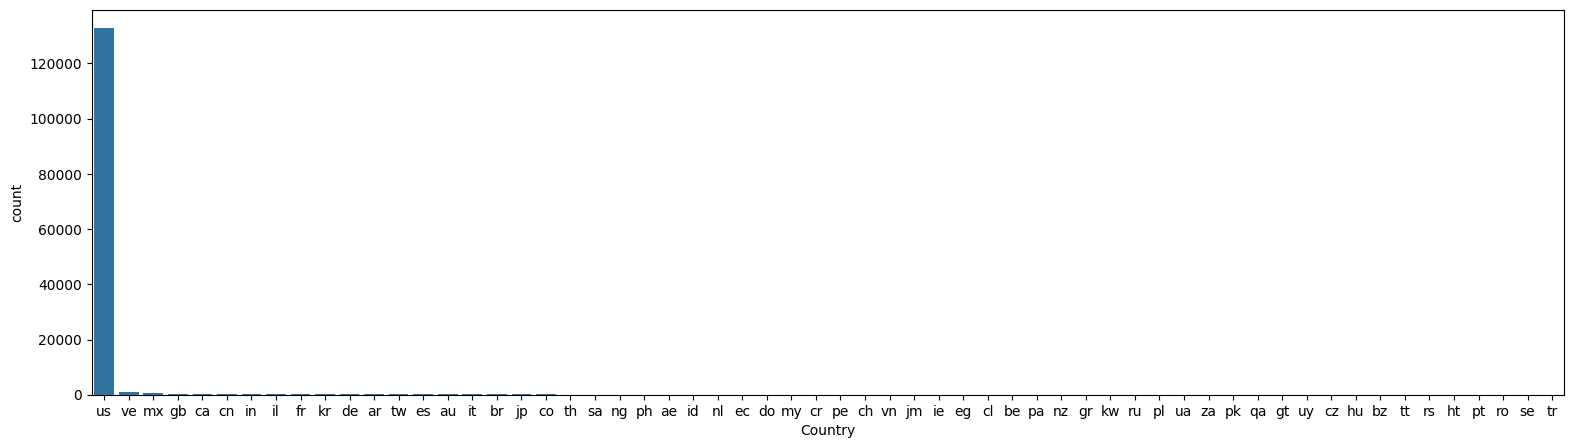

In [363]:
plt.figure(figsize=(19,5))
s = d['Country'].value_counts().head(60)
sns.countplot(data = d, x = 'Country', order=s.index)
plt.show()

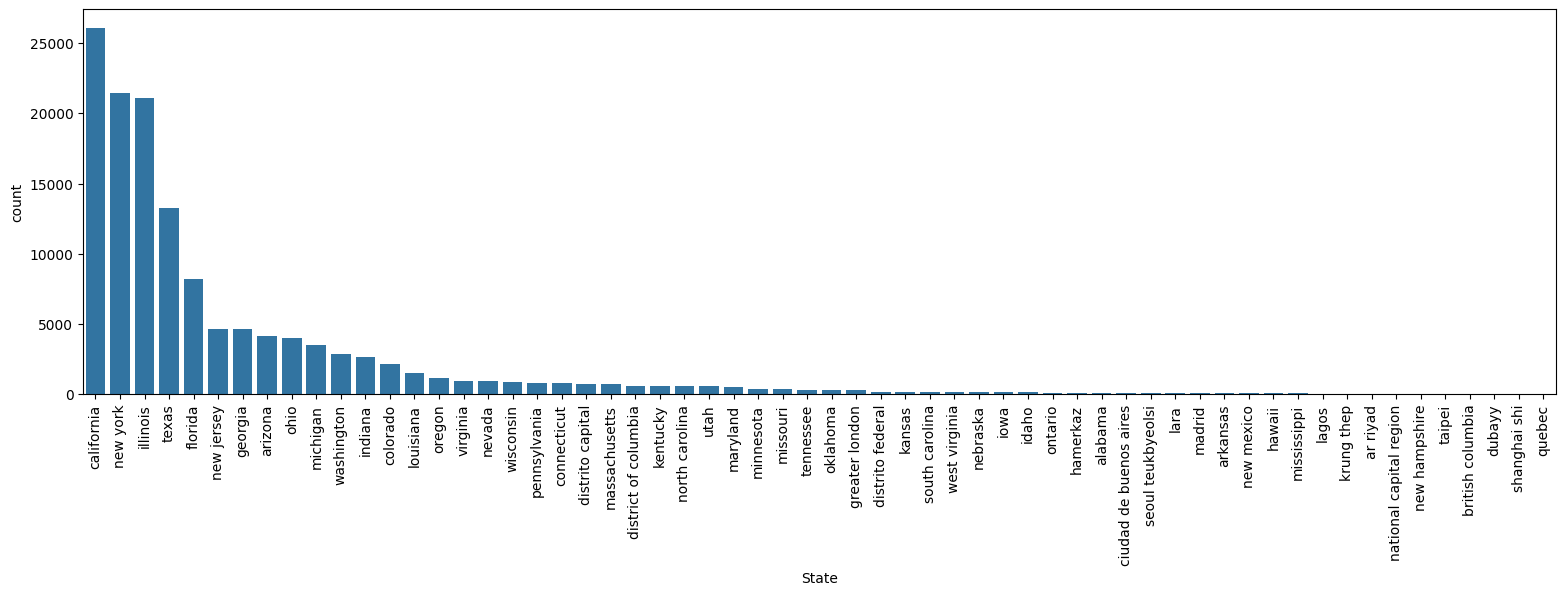

In [364]:
plt.figure(figsize=(19, 5))
s = d['State'].value_counts().head(60)
sns.countplot(data=d, x='State', order=s.index)
plt.xticks(rotation=-270)
plt.show()

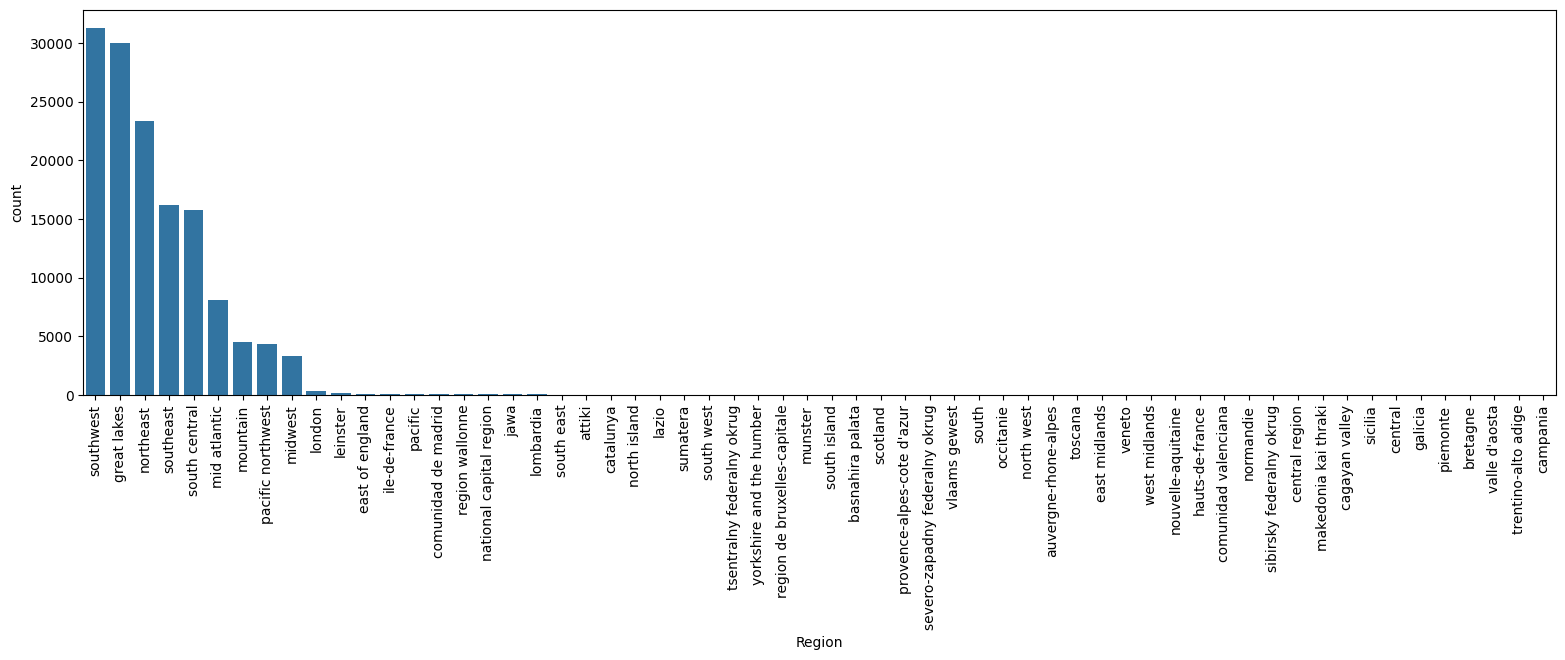

In [365]:
plt.figure(figsize=(19, 5))
s = d['Region'].value_counts().head(60)
sns.countplot(data=d, x='Region', order=s.index)
plt.xticks(rotation=-270)
plt.show()

In [366]:
# Total Length: 129
d['Country'].value_counts()

us    132838
ve       829
mx       461
gb       392
ca       281
       ...  
lc         1
ci         1
mp         1
fj         1
dj         1
Name: Country, Length: 129, dtype: int64

In [367]:
vc = d['Country'].value_counts()
unique_values = vc[vc <= 100].index
print(d[d['Country'].isin(unique_values)]['Country'])
d['Country'] = np.where(d['Country'].isin(unique_values), 'others', d['Country'])

72        gt
75        ph
99        do
351       ch
419       pl
          ..
138548    cz
138581    sk
138684    bb
138696    am
138702    ae
Name: Country, Length: 2075, dtype: object


In [368]:
d['State'].value_counts()

california                26095
new york                  21446
illinois                  21075
texas                     13290
florida                    8239
                          ...  
windsor and maidenhead        1
wexford                       1
puebla                        1
aberdeen city                 1
kosicky                       1
Name: State, Length: 457, dtype: int64

In [369]:
vc = d['State'].value_counts()
unique_values = vc[vc <= 100].index
print(d[d['State'].isin(unique_values)]['State'])
d['State'] = np.where(d['State'].isin(unique_values), 'others', d['State'])

3                    arkansas
35                 new mexico
51        michoacan de ocampo
72                  guatemala
75                    isabela
                 ...         
138684          saint michael
138696                yerevan
138702                 dubayy
138711                montana
138741                   lara
Name: State, Length: 4722, dtype: object


In [370]:
d['Region'].value_counts()

southwest              31257
great lakes            30009
northeast              23392
southeast              16211
south central          15788
                       ...  
campania                   2
centre-val de loire        2
pays de la loire           2
grand est                  2
centre-west                1
Name: Region, Length: 64, dtype: int64

In [371]:
vc = d['Region'].value_counts()
unique_values = vc[vc <= 100].index
print(d[d['Region'].isin(unique_values)]['Region'])
d['Region'] = np.where(d['Region'].isin(unique_values), 'others', d['Region'])

75                  cagayan valley
262       yorkshire and the humber
420                  east midlands
526                       campania
574                          south
                    ...           
138000             region wallonne
138089               east midlands
138276                     pacific
138696    yorkshire and the humber
138702             region wallonne
Name: Region, Length: 897, dtype: object


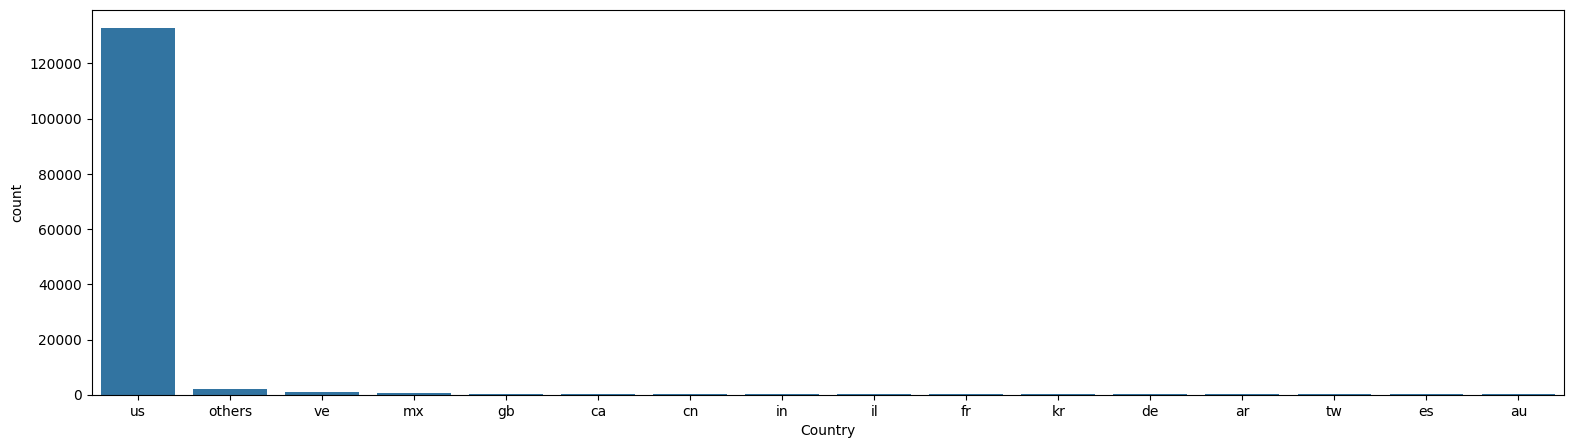

In [372]:
plt.figure(figsize=(19,5))
s = d['Country'].value_counts().head(60)
sns.countplot(data = d, x = 'Country', order=s.index)
plt.show()

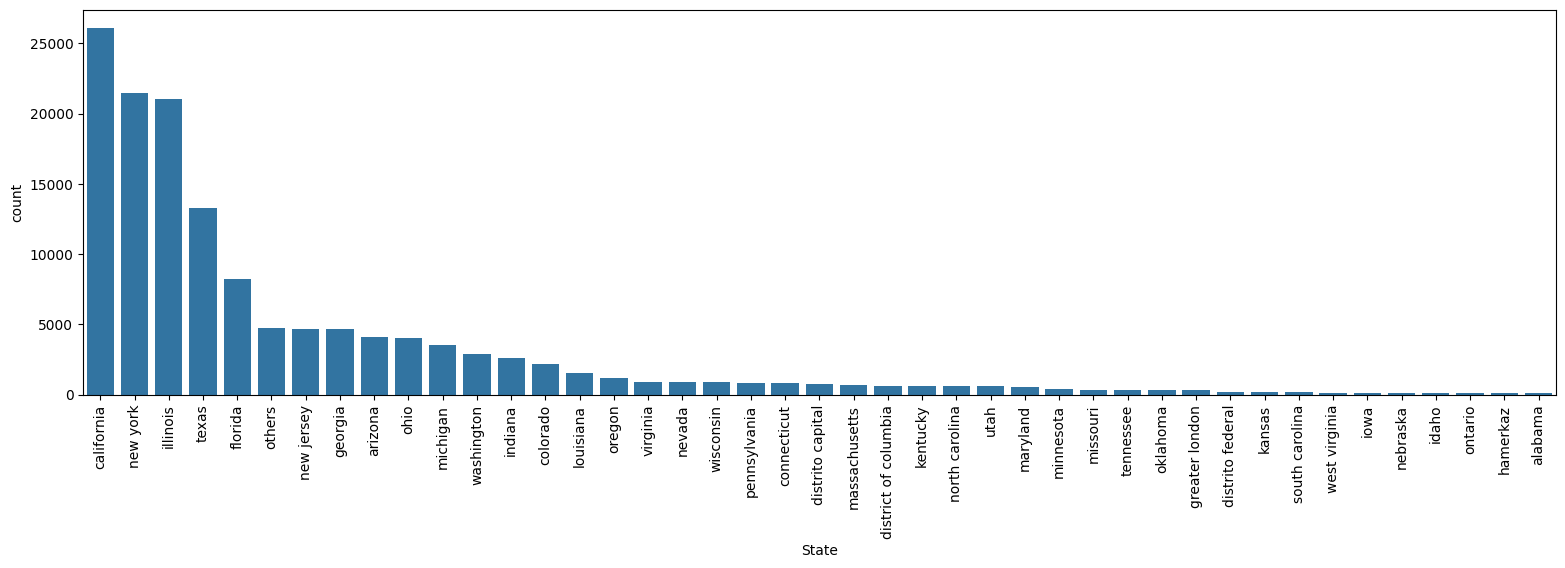

In [373]:
plt.figure(figsize=(19, 5))
s = d['State'].value_counts().head(60)
sns.countplot(data=d, x='State', order=s.index)
plt.xticks(rotation=-270)
plt.show()

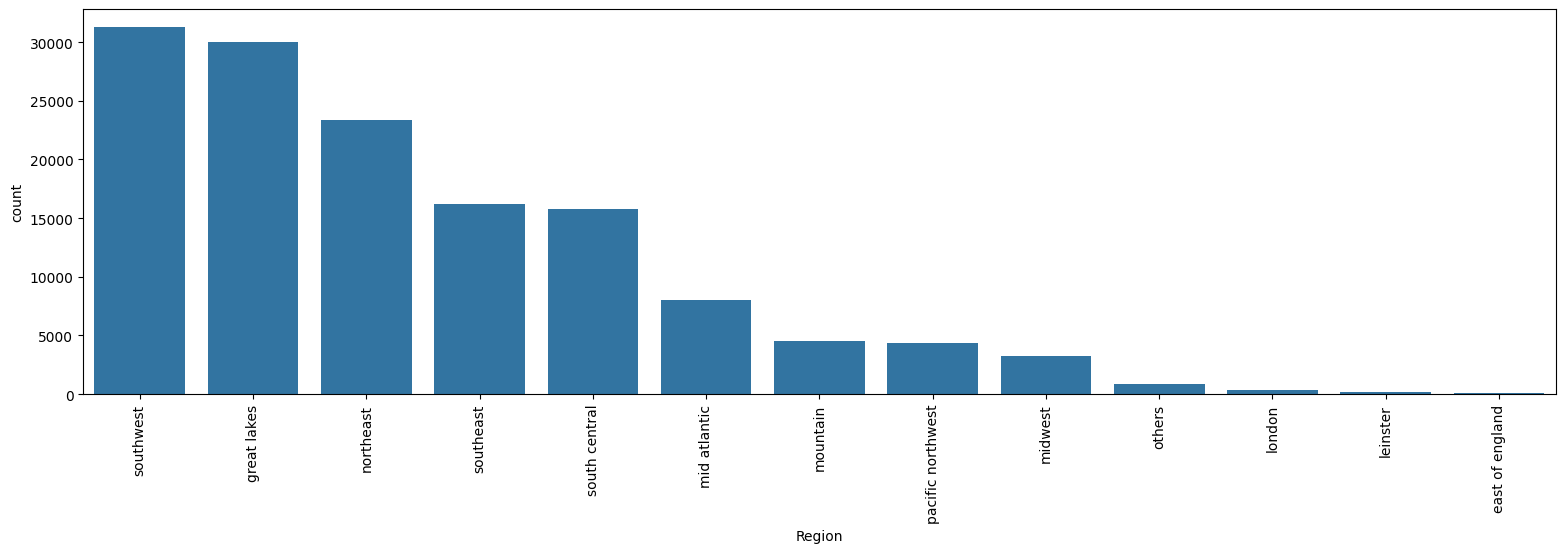

In [374]:
plt.figure(figsize=(19, 5))
s = d['Region'].value_counts().head(60)
sns.countplot(data=d, x='Region', order=s.index)
plt.xticks(rotation=-270)
plt.show()

In [375]:
fe_region = d['Region'].value_counts(normalize=True).to_dict()
d['Region_freq_encoded'] = d['Region'].map(fe_region)

fe_state = d['State'].value_counts(normalize=True).to_dict()
d['State_freq_encoded'] = d['State'].map(fe_state)

fe_country = d['Country'].value_counts(normalize=True).to_dict()
d['Country_freq_encoded'] = d['Country'].map(fe_country)

In [376]:
d.sample(5)

,V1CF,V2CF,V3CF,V4CF,V5CF,AreaCode,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,...,EmailUpdateMonth,EmailUpdateYear,TransactionTimeOfDay,AddressUpdateTimeOfDay,EmailUpdateTimeOfDay,ConnectionOrg_freq_encoded,V6CF_freq_encoded,Region_freq_encoded,State_freq_encoded,Country_freq_encoded
28585,99,94,95,532,35620,0.0,Communications,cable,medium,misc_num,...,5,2010,Night,Evening,Evening,0.081447,0.124931,0.114098,0.096045,0.960006
53446,76,74,10,535,33100,404.0,Comcast Company,cable,medium,misc_num,...,7,2011,Morning,Night,Evening,0.180651,0.124931,0.225891,0.188586,0.960006
57685,99,95,89,623,16980,512.0,Communications,mobile wireless,medium,misc_num,...,2,2005,Evening,Evening,Evening,0.081447,0.124931,0.225891,0.188586,0.960006
25766,99,23,5,807,35620,602.0,Cell co,mobile wireless,medium,net.,...,2,2006,Afternoon,Night,Afternoon,0.025424,0.537146,0.216872,0.002891,0.960006
42549,99,97,61,803,16980,608.0,Comcast Company,cable,medium,com.,...,4,2012,Night,Afternoon,Evening,0.180651,0.290369,0.216872,0.152307,0.960006


In [377]:
print(d['Region'].value_counts())
print(d['State'].value_counts())
print(d['Country'].value_counts())

southwest            31257
great lakes          30009
northeast            23392
southeast            16211
south central        15788
mid atlantic          8057
mountain              4550
pacific northwest     4352
midwest               3282
others                 897
london                 335
leinster               138
east of england        104
Name: Region, dtype: int64
california              26095
new york                21446
illinois                21075
texas                   13290
florida                  8239
others                   4722
new jersey               4658
georgia                  4655
arizona                  4139
ohio                     4034
michigan                 3526
washington               2894
indiana                  2647
colorado                 2187
louisiana                1526
oregon                   1197
virginia                  934
nevada                    927
wisconsin                 899
pennsylvania              847
connecticut           

In [378]:
# d.drop(columns=['Region', 'State', 'Country', 'ConnectionOrg', 'V6CF'], inplace=True)

In [379]:
for col in d:
  if d[col].dtypes == 'object':
    print(f"{col}\nUnique Values: {d[col].nunique()}\n")

# None i guess

ConnectionOrg
Unique Values: 46

ConnectionType
Unique Values: 11

ConnectionSpeed
Unique Values: 4

V6CF
Unique Values: 13

channel
Unique Values: 4

webSessOS
Unique Values: 20

webSessWebBrowser
Unique Values: 23

Region
Unique Values: 13

State
Unique Values: 43

Country
Unique Values: 16

TransactionTimeOfDay
Unique Values: 4

AddressUpdateTimeOfDay
Unique Values: 4

EmailUpdateTimeOfDay
Unique Values: 4



In [380]:
d['webSessOS'].value_counts()

Windows 10        35957
Windows 7         34913
Mac OS X          28462
iOS               17529
Android           12158
Windows 8.1        5533
Chrome OS          1027
Windows Vista       722
Windows XP          560
Windows 8           498
Linux               414
Windows Phone       262
Ubuntu              172
Windows RT 8.1       81
BlackBerry OS        55
Fedora               13
Windows RT            8
Windows NT 4.0        4
FreeBSD               3
BREW                  1
Name: webSessOS, dtype: int64

In [381]:
d['webSessOS'] = np.where(d['webSessOS'].isin(['Windows 10', 'Windows 8.1', 'Windows 8', 'Windows 7', 'Windows RT 8.1']), 'New_Windows', d['webSessOS'])
d['webSessOS'] = np.where(d['webSessOS'].isin(['Windows Vista', 'Windows XP', 'Windows RT', 'Windows NT 4.0']), 'Old_Windows', d['webSessOS'])
d['webSessOS'] = np.where(d['webSessOS'].isin(['Linux', 'Ubuntu', 'Fedora', 'FreeBSD']), 'Linux_Based', d['webSessOS'])
d['webSessOS'] = np.where(d['webSessOS'].isin(['Chrome OS', 'BlackBerry OS', 'BREW']), 'Others', d['webSessOS'])

In [382]:
d['webSessWebBrowser'].value_counts()

Chrome               64452
Mobile Safari        16849
IE                   14198
Safari               13034
Chrome Mobile        11489
Firefox              10904
Edge                  5798
Chrome Mobile iOS      592
Opera                  252
Android                232
Amazon Silk            187
IE Mobile              153
BlackBerry WebKit       69
Firefox Mobile          42
Sogou Explorer          33
Chromium                30
Vivaldi                 26
Yandex Browser          17
UC Browser               5
QQ Browser               4
Opera Mini               4
Opera Mobile             1
Puffin                   1
Name: webSessWebBrowser, dtype: int64

In [383]:
d['webSessWebBrowser'] = np.where(d['webSessWebBrowser'].isin(['Chrome', 'Chrome Mobile', 'Chrome Mobile iOS']), 'Google Chrome', d['webSessWebBrowser'])
d['webSessWebBrowser'] = np.where(d['webSessWebBrowser'].isin(['Mobile Safari', 'Safari']), 'Safari', d['webSessWebBrowser'])
d['webSessWebBrowser'] = np.where(d['webSessWebBrowser'].isin(['IE', 'IE Mobile', 'Edge']), 'Internet Explorer', d['webSessWebBrowser'])

others = d['webSessWebBrowser'].value_counts()[d['webSessWebBrowser'].value_counts() < 100].index
d['webSessWebBrowser'] = np.where(d['webSessWebBrowser'].isin(others), 'Others', d['webSessWebBrowser'])

In [384]:
d['ConnectionType'].value_counts()

cable                 69870
tx                    23322
dsl                   21577
mobile wireless       14460
unknown                4927
ocx                    2878
fixed wireless          733
consumer satellite      286
dialup                  249
framerelay               44
isdn                     26
Name: ConnectionType, dtype: int64

In [385]:
others = d['ConnectionType'].value_counts()[d['ConnectionType'].value_counts() < 100].index
d['ConnectionType'] = np.where(d['ConnectionType'].isin(others), 'Others', d['ConnectionType'])

In [386]:
d.nunique().sort_values(ascending=False)

MainEntityUse                 937
V5CF                          582
AreaCode                      254
V4CF                          207
ConnectionOrg                  46
ConnectionOrg_freq_encoded     45
State                          43
State_freq_encoded             41
EmailUpdateDay                 31
AddressUpdateDay               31
TransactionDay                 31
V2CF                           29
AddressUpdateYear              29
V3CF                           23
Country                        16
Country_freq_encoded           16
Region                         13
Region_freq_encoded            13
V6CF_freq_encoded              13
EmailUpdateYear                13
V6CF                           13
AddressUpdateMonth             12
EmailUpdateMonth               12
ConnectionType                 10
V1CF                            9
webSessOS                       8
webSessWebBrowser               8
TransactionMonth                6
channel                         4
TransactionTim

In [387]:
binary_columns = [col for col in d.columns if d[col].nunique() <= 3]

# Display the columns with binary values
print("Columns with Binary Values:")
print(binary_columns)

Columns with Binary Values:
['IsOldDevice', 'Fraud']


In [388]:
d.describe(include = 'object')

,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,webSessOS,webSessWebBrowser,Region,State,Country,TransactionTimeOfDay,AddressUpdateTimeOfDay,EmailUpdateTimeOfDay
count,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372,138372
unique,46,10,4,13,4,8,8,13,43,16,4,4,4
top,Comcast Company,cable,medium,net.,SOA,New_Windows,Google Chrome,southwest,california,us,Afternoon,Night,Afternoon
freq,24997,69870,92582,74326,71746,76982,76533,31257,26095,132838,44991,51285,54484


In [389]:
# d.isnull().sum()
# None
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138372 entries, 0 to 138751
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   V1CF                        138372 non-null  int64  
 1   V2CF                        138372 non-null  int64  
 2   V3CF                        138372 non-null  int64  
 3   V4CF                        138372 non-null  int64  
 4   V5CF                        138372 non-null  int64  
 5   AreaCode                    138372 non-null  float64
 6   ConnectionOrg               138372 non-null  object 
 7   ConnectionType              138372 non-null  object 
 8   ConnectionSpeed             138372 non-null  object 
 9   V6CF                        138372 non-null  object 
 10  channel                     138372 non-null  object 
 11  webSessOS                   138372 non-null  object 
 12  webSessWebBrowser           138372 non-null  object 
 13  IsOldDevice   

In [390]:
d.select_dtypes(include=['object']).nunique().sort_values(ascending = False)

ConnectionOrg             46
State                     43
Country                   16
V6CF                      13
Region                    13
ConnectionType            10
webSessOS                  8
webSessWebBrowser          8
ConnectionSpeed            4
channel                    4
TransactionTimeOfDay       4
AddressUpdateTimeOfDay     4
EmailUpdateTimeOfDay       4
dtype: int64

In [391]:
cols = ['ConnectionOrg', 'State', 'Country', 'V6CF', 'Region']
d.drop(columns = cols, inplace = True)

In [392]:
d['DeviceCategory'] = np.where(d['IsOldDevice'] == 1.0, 'Old_Device',
                               np.where(d['IsOldDevice'] == 0.0, 'Not_Old_Device',
                                        np.where(d['IsOldDevice'] == 1.5, 'Either', 'Special_Category')))
d.drop(columns='IsOldDevice', inplace=True)

In [393]:
d['DeviceCategory'].value_counts()

Old_Device        109607
Not_Old_Device     24712
Either              4053
Name: DeviceCategory, dtype: int64

In [394]:
objects = d.select_dtypes(include=['object']).columns.tolist()
print(objects)

['ConnectionType', 'ConnectionSpeed', 'channel', 'webSessOS', 'webSessWebBrowser', 'TransactionTimeOfDay', 'AddressUpdateTimeOfDay', 'EmailUpdateTimeOfDay', 'DeviceCategory']


In [395]:
dummies = pd.get_dummies(d[objects], drop_first=True)
d = pd.concat([d, dummies], axis=1)
d = d.drop(objects, axis=1)

In [396]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138372 entries, 0 to 138751
Data columns (total 61 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   V1CF                                 138372 non-null  int64  
 1   V2CF                                 138372 non-null  int64  
 2   V3CF                                 138372 non-null  int64  
 3   V4CF                                 138372 non-null  int64  
 4   V5CF                                 138372 non-null  int64  
 5   AreaCode                             138372 non-null  float64
 6   MainEntityUse                        138372 non-null  float64
 7   Fraud                                138372 non-null  int64  
 8   TransactionDay                       138372 non-null  int64  
 9   TransactionMonth                     138372 non-null  int64  
 10  AddressUpdateDay                     138372 non-null  int64  
 11  AddressUpdate

In [398]:
d.to_csv('FD-Dataset-2.csv', index=False)